In [1]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

In [ ]:
#Printing list

for folder in Adam_training/*; do  tr -s " " < $folder/results.csv | sed 's/ /,/g' > $folder/results.csv1; mv $folder/results.csv1 $folder/results.csv; done

In [22]:
for folder in Adam_training/*; do  sed 's/,,/,/g' $folder/results.csv > $folder/results.csv1; mv $folder/results.csv1 $folder/results.csv; done

SyntaxError: invalid syntax (1392559314.py, line 1)

In [2]:
pwd

'/Users/gopalsrivastava/Library/CloudStorage/OneDrive-LouisianaStateUniversity/SUMMERAGGRC2024/NewSyntheticData/Images/5Jul2024'

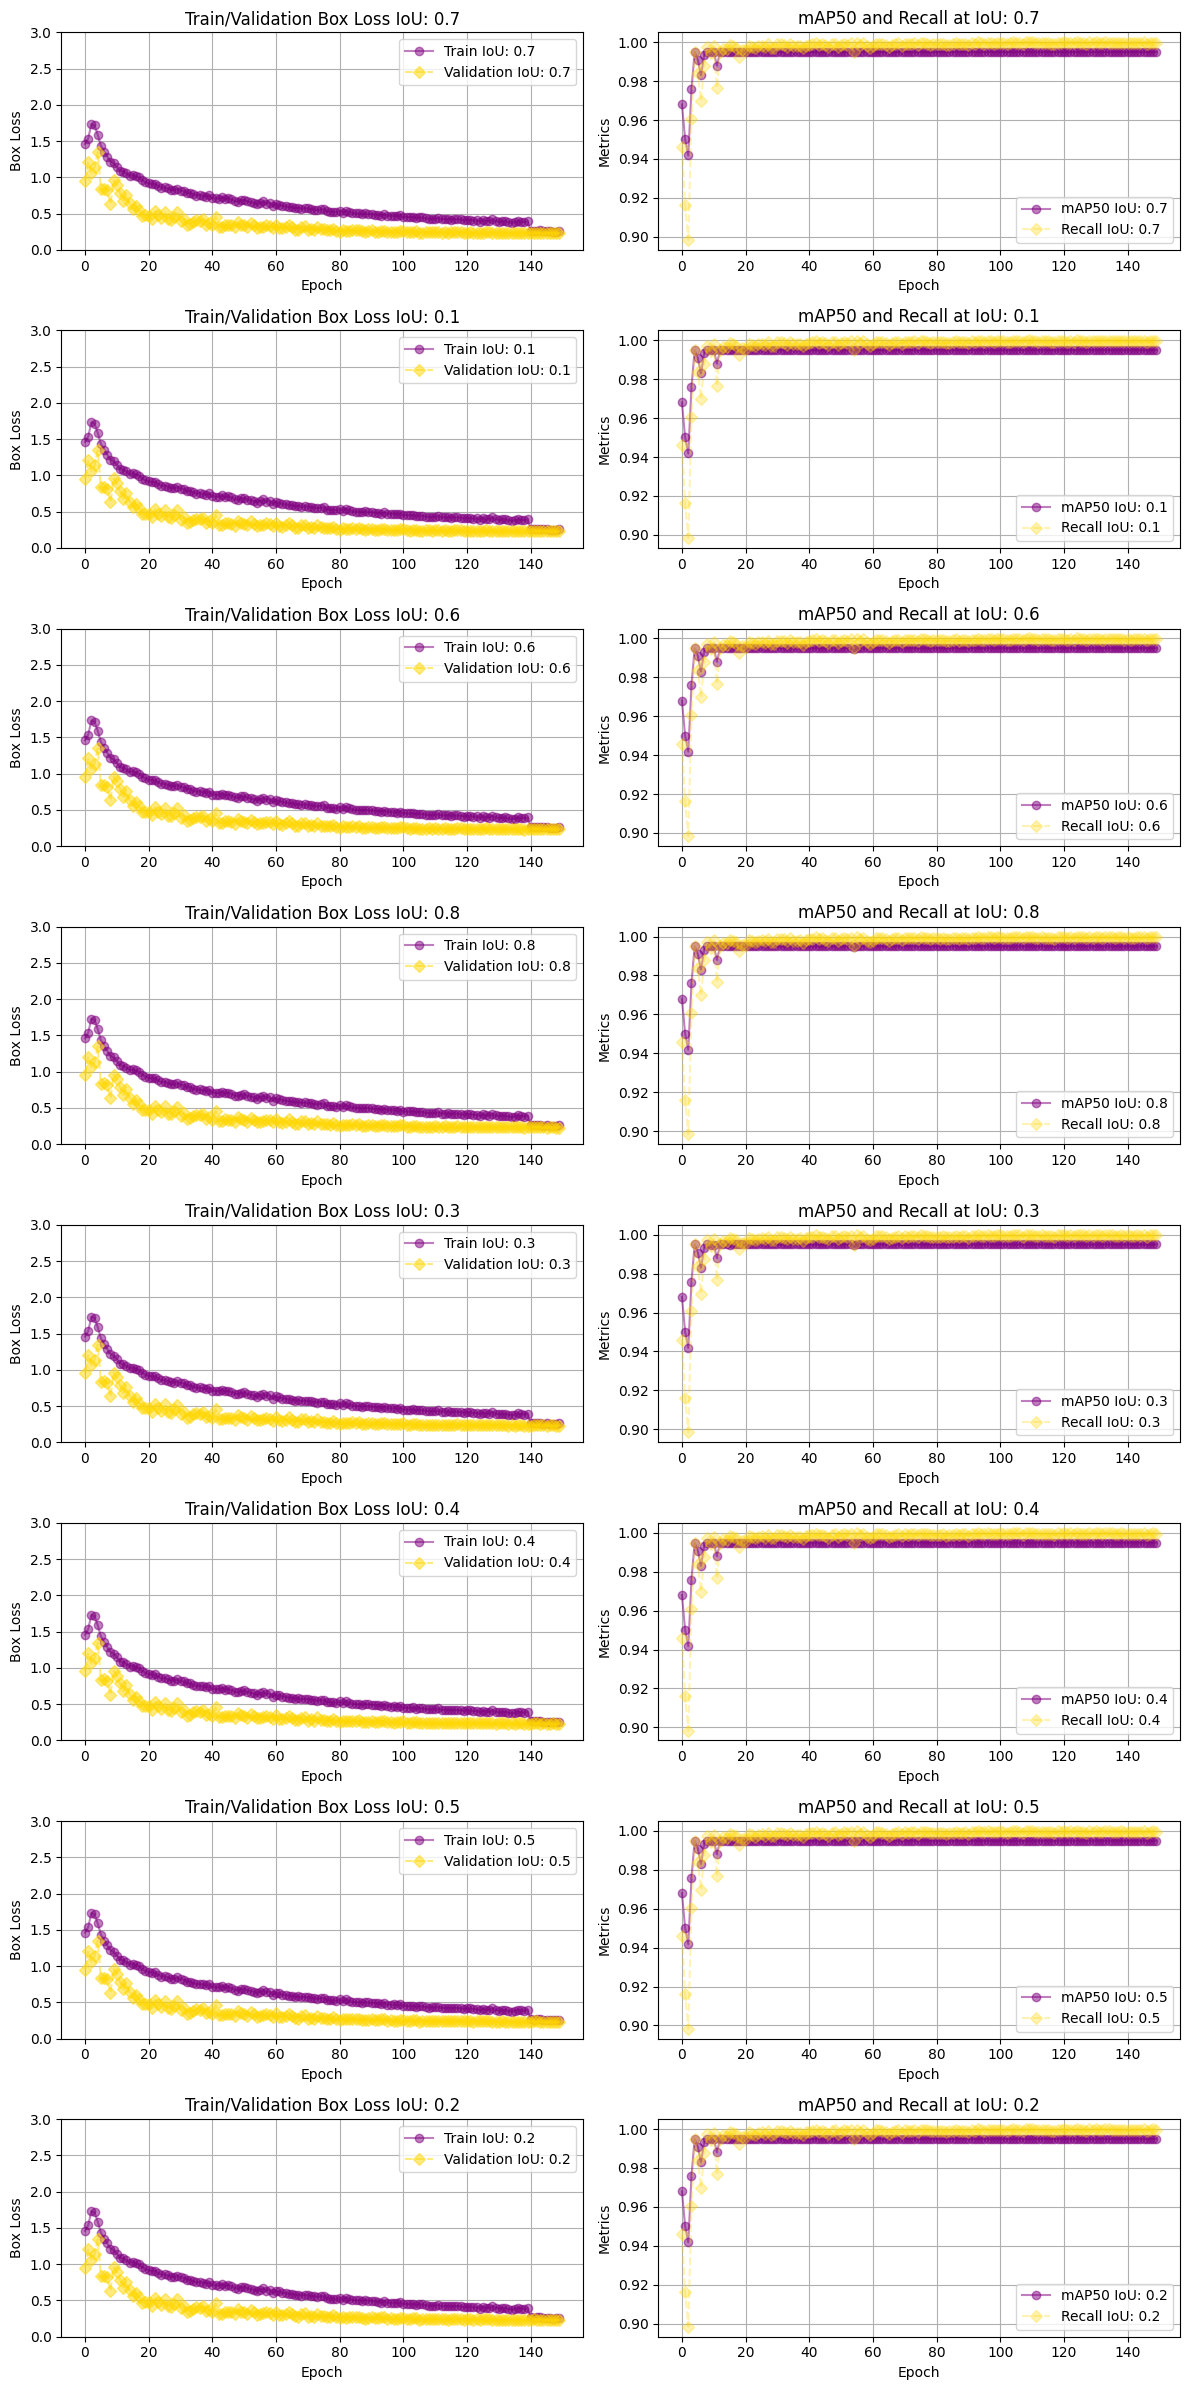

Best model based on lowest validation box loss: SGD_training/SGD_150_0.7 with loss 0.22862
Best model based on highest mAP50: SGD_training/SGD_150_0.7 with mAP50 0.995


In [3]:
# SGD

import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the folders
folders = [f"SGD_training/{folder}" for folder in os.listdir("SGD_training") if "SGD_150" in folder]
#folders = ['AdamW_training/AdamW_50_0.1', 'AdamW_training/AdamW_50_0.2', 'AdamW_training/AdamW_50_0.3', 'AdamW_training/AdamW_50_0.4', 'AdamW_training/AdamW_50_0.5', 'AdamW_training/AdamW_50_0.6', 'AdamW_training/AdamW_50_0.7', 'AdamW_training/AdamW_50_0.8']

# Initialize a plot with subplots
fig, axes = plt.subplots(len(folders), 2, figsize=(12, 3 * len(folders)))

# Define markers for different folders
#markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p']

# Track the best model
best_model_loss = {'folder': None, 'value': float('inf')}
best_model_map50 = {'folder': None, 'value': float('-inf')}

# Iterate over each folder and plot the box_loss and mAP50
for i, folder in enumerate(folders):
    csv_path = os.path.join(folder, 'results.csv')
    if os.path.exists(csv_path):
        # Read the CSV file
        df = pd.read_csv(csv_path)
        
        # Extract relevant columns
        train_box_loss = df['train/box_loss'].dropna()
        val_box_loss = df['val/box_loss'].dropna()
        train_map50 = df['metrics/mAP50(B)'].dropna()
        recall = df['metrics/recall(B)'].dropna()
        
        # Extract the IoU value from the folder name
        iou = folder.split('_')[-1]
        
        # Plot train and val box loss
        axes[i, 0].plot(train_box_loss, marker="o", label=f'Train IoU: {iou}', linestyle='-', color='purple', alpha=0.5)
        axes[i, 0].plot(val_box_loss, marker="D", label=f'Validation IoU: {iou}', linestyle='--', color='gold', alpha=0.5)
        axes[i, 0].set_title(f'Train/Validation Box Loss IoU: {iou}')
        axes[i, 0].set_xlabel('Epoch')
        axes[i, 0].set_ylabel('Box Loss')
        axes[i, 0].legend()
        axes[i, 0].grid(True)
        axes[i, 0].set_ylim(0, 3)
        
        # Plot train and val mAP50
        axes[i, 1].plot(train_map50, marker="o", label=f'mAP50 IoU: {iou}', linestyle='-', color='purple', alpha=0.5)
        axes[i, 1].plot(recall, marker="D", label=f'Recall IoU: {iou}', linestyle='--', color='gold', alpha=0.3)
        axes[i, 1].set_title(f'mAP50 and Recall at IoU: {iou}')
        axes[i, 1].set_xlabel('Epoch')
        axes[i, 1].set_ylabel('Metrics')
        axes[i, 1].legend()
        axes[i, 1].grid(True)

        # Update best model tracking
        min_val_box_loss = val_box_loss.min()
        max_map50 = train_map50.max()
        
        if min_val_box_loss < best_model_loss['value']:
            best_model_loss['value'] = min_val_box_loss
            best_model_loss['folder'] = folder
        
        if max_map50 > best_model_map50['value']:
            best_model_map50['value'] = max_map50
            best_model_map50['folder'] = folder

# Adjust layout
plt.tight_layout()

# Save and show the plot
#plt.savefig('train_val_boxloss_map50recall_plot_AdamW150.png')
plt.show()

# Print the best models
print(f"Best model based on lowest validation box loss: {best_model_loss['folder']} with loss {best_model_loss['value']}")
print(f"Best model based on highest mAP50: {best_model_map50['folder']} with mAP50 {best_model_map50['value']}")

# Best based on Box loss
# 50: 
#Best model based on lowest validation box loss: SGD_training/SGD_50_0.2 with loss 0.27293
#Best model based on highest mAP50: SGD_training/SGD_50_0.2 with mAP50 0.995

# 100:
#Best model based on lowest validation box loss: SGD_training/SGD_100_0.3 with loss 0.24417
#Best model based on highest mAP50: SGD_training/SGD_100_0.3 with mAP50 0.995

# 150
# Best model based on lowest validation box loss: SGD_training/SGD_150_0.7 with loss 0.22862
#Best model based on highest mAP50: SGD_training/SGD_150_0.7 with mAP50 0.995

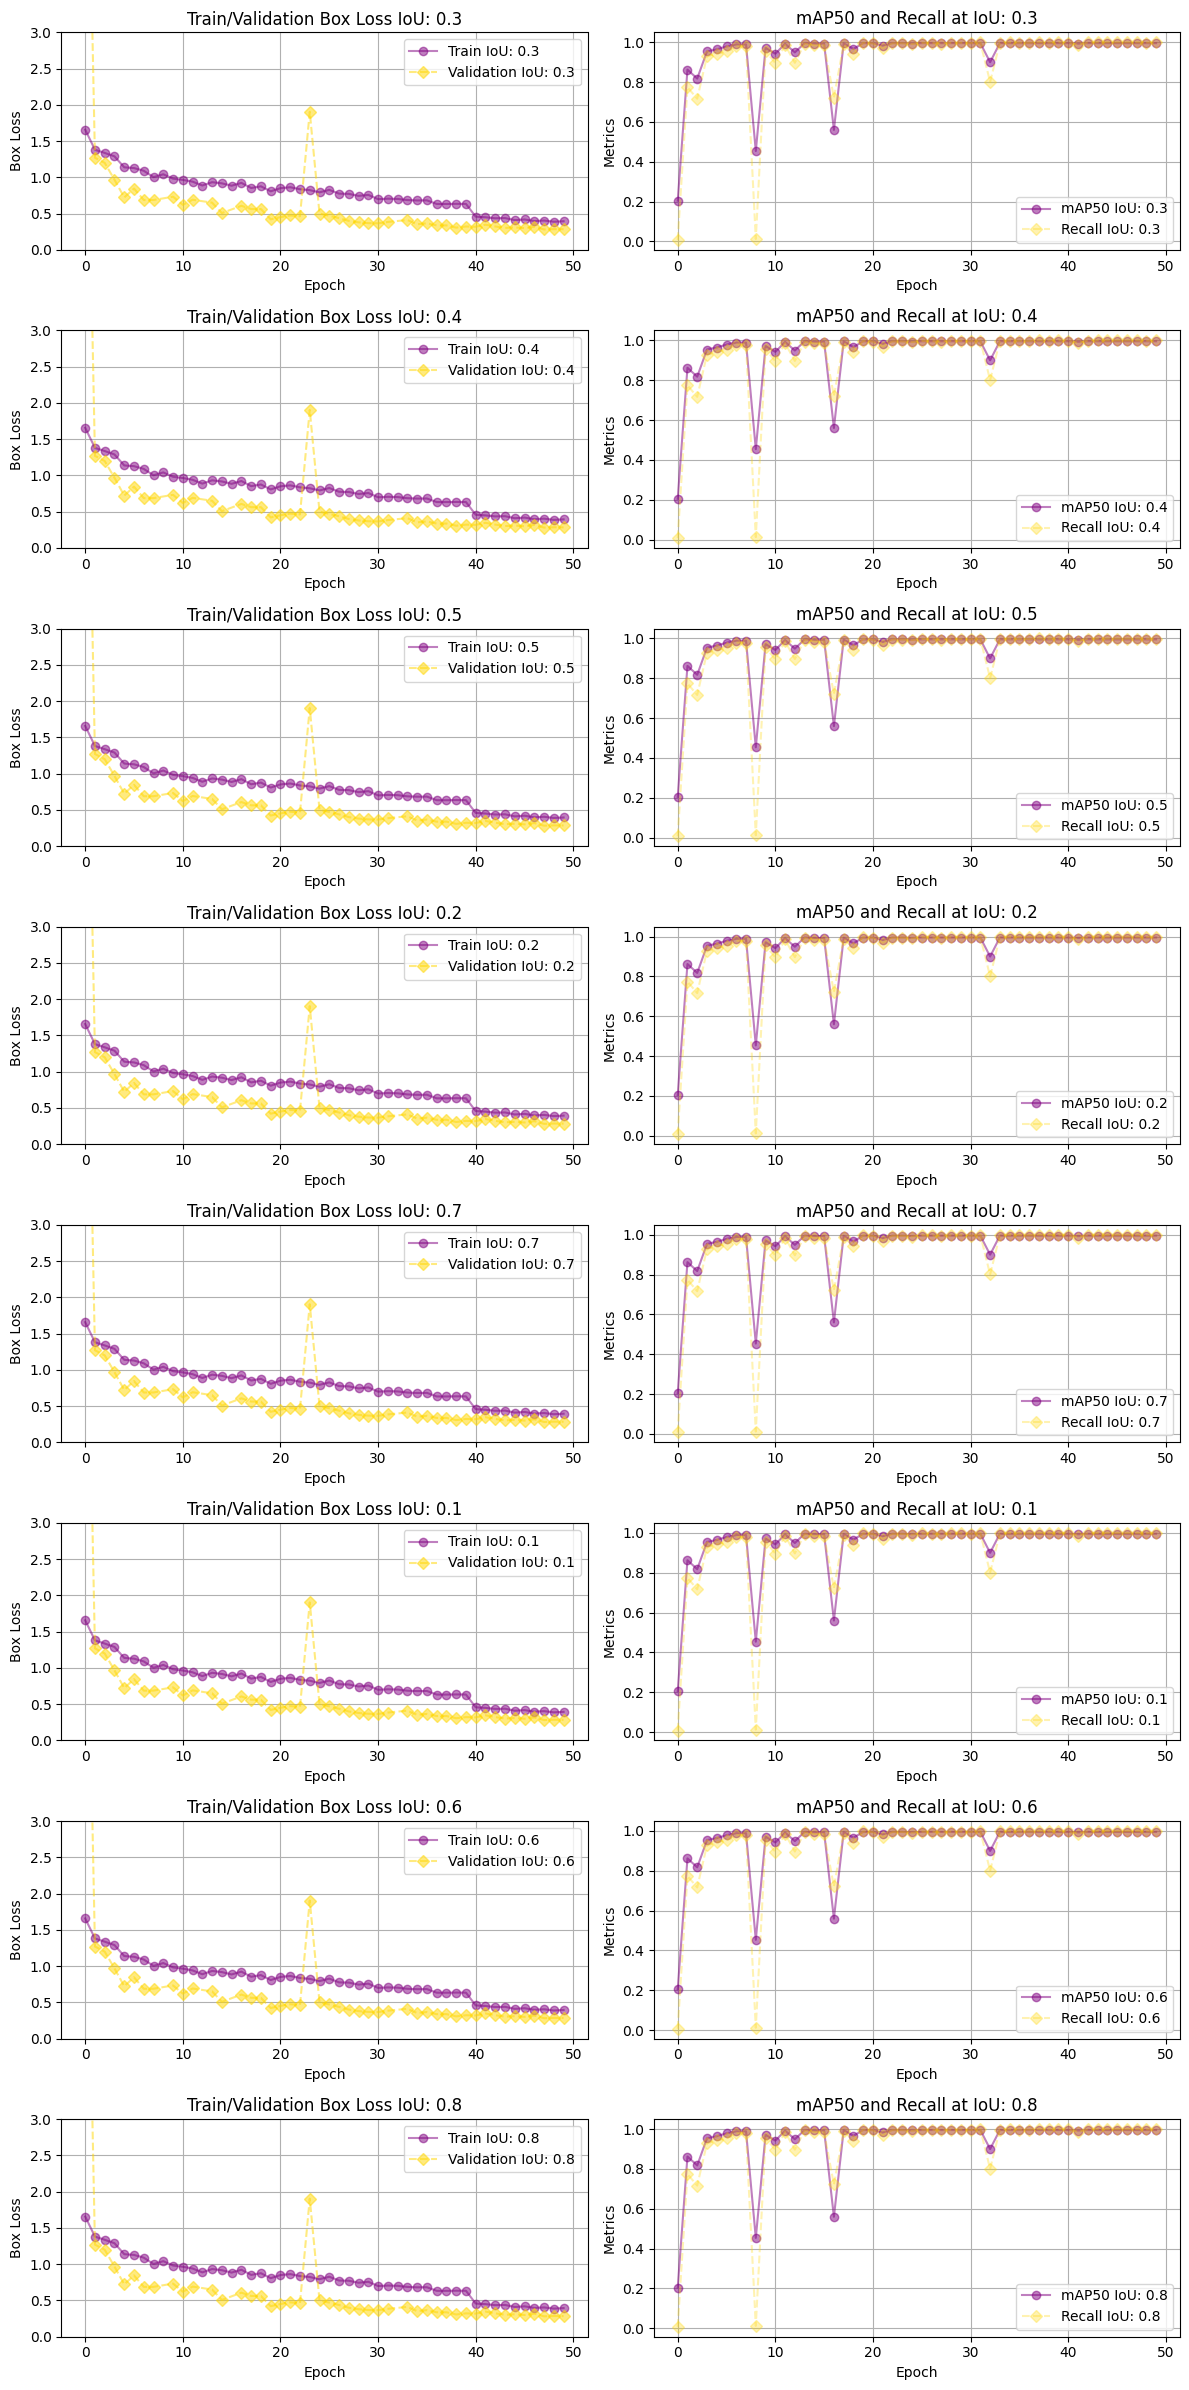

Best model based on lowest validation box loss: Adam_training/Adam_50_0.3 with loss 0.28133
Best model based on highest mAP50: Adam_training/Adam_50_0.3 with mAP50 0.995


In [6]:

import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the folders
folders = [f"Adam_training/{folder}" for folder in os.listdir("Adam_training") if "Adam_50" in folder]
#folders = ['AdamW_training/AdamW_50_0.1', 'AdamW_training/AdamW_50_0.2', 'AdamW_training/AdamW_50_0.3', 'AdamW_training/AdamW_50_0.4', 'AdamW_training/AdamW_50_0.5', 'AdamW_training/AdamW_50_0.6', 'AdamW_training/AdamW_50_0.7', 'AdamW_training/AdamW_50_0.8']

# Initialize a plot with subplots
fig, axes = plt.subplots(len(folders), 2, figsize=(12, 3 * len(folders)))

# Define markers for different folders
#markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p']

# Track the best model
best_model_loss = {'folder': None, 'value': float('inf')}
best_model_map50 = {'folder': None, 'value': float('-inf')}

# Iterate over each folder and plot the box_loss and mAP50
for i, folder in enumerate(folders):
    csv_path = os.path.join(folder, 'results.csv')
    if os.path.exists(csv_path):
        # Read the CSV file
        df = pd.read_csv(csv_path)
        
        # Extract relevant columns
        train_box_loss = df['train/box_loss'].dropna()
        val_box_loss = df['val/box_loss'].dropna()
        train_map50 = df['metrics/mAP50(B)'].dropna()
        recall = df['metrics/recall(B)'].dropna()
        
        # Extract the IoU value from the folder name
        iou = folder.split('_')[-1]
        
        # Plot train and val box loss
        axes[i, 0].plot(train_box_loss, marker="o", label=f'Train IoU: {iou}', linestyle='-', color='purple', alpha=0.5)
        axes[i, 0].plot(val_box_loss, marker="D", label=f'Validation IoU: {iou}', linestyle='--', color='gold', alpha=0.5)
        axes[i, 0].set_title(f'Train/Validation Box Loss IoU: {iou}')
        axes[i, 0].set_xlabel('Epoch')
        axes[i, 0].set_ylabel('Box Loss')
        axes[i, 0].legend()
        axes[i, 0].grid(True)
        axes[i, 0].set_ylim(0, 3)
        
        # Plot train and val mAP50
        axes[i, 1].plot(train_map50, marker="o", label=f'mAP50 IoU: {iou}', linestyle='-', color='purple', alpha=0.5)
        axes[i, 1].plot(recall, marker="D", label=f'Recall IoU: {iou}', linestyle='--', color='gold', alpha=0.3)
        axes[i, 1].set_title(f'mAP50 and Recall at IoU: {iou}')
        axes[i, 1].set_xlabel('Epoch')
        axes[i, 1].set_ylabel('Metrics')
        axes[i, 1].legend()
        axes[i, 1].grid(True)

        # Update best model tracking
        min_val_box_loss = val_box_loss.min()
        max_map50 = train_map50.max()
        
        if min_val_box_loss < best_model_loss['value']:
            best_model_loss['value'] = min_val_box_loss
            best_model_loss['folder'] = folder
        
        if max_map50 > best_model_map50['value']:
            best_model_map50['value'] = max_map50
            best_model_map50['folder'] = folder

# Adjust layout
plt.tight_layout()

# Save and show the plot
#plt.savefig('train_val_boxloss_map50recall_plot_AdamW150.png')
plt.show()

# Print the best models
print(f"Best model based on lowest validation box loss: {best_model_loss['folder']} with loss {best_model_loss['value']}")
print(f"Best model based on highest mAP50: {best_model_map50['folder']} with mAP50 {best_model_map50['value']}")

# Best based on Box loss
# 50: 
#Best model based on lowest validation box loss: Adam_training/Adam_50_0.3 with loss 0.28133
#Best model based on highest mAP50: Adam_training/Adam_50_0.3 with mAP50 0.995

# 100:
#Best model based on lowest validation box loss: Adam_training/Adam_100_0.1 with loss 0.26303
#Best model based on highest mAP50: Adam_training/Adam_100_0.1 with mAP50 0.995

# 150
# Best model based on lowest validation box loss: Adam_training/Adam_150_0.5 with loss 0.25124
# Best model based on highest mAP50: Adam_training/Adam_150_0.5 with mAP50 0.995

In [8]:
pwd

'/Users/gopalsrivastava/Library/CloudStorage/OneDrive-LouisianaStateUniversity/SUMMERAGGRC2024/NewSyntheticData/Images/5Jul2024'

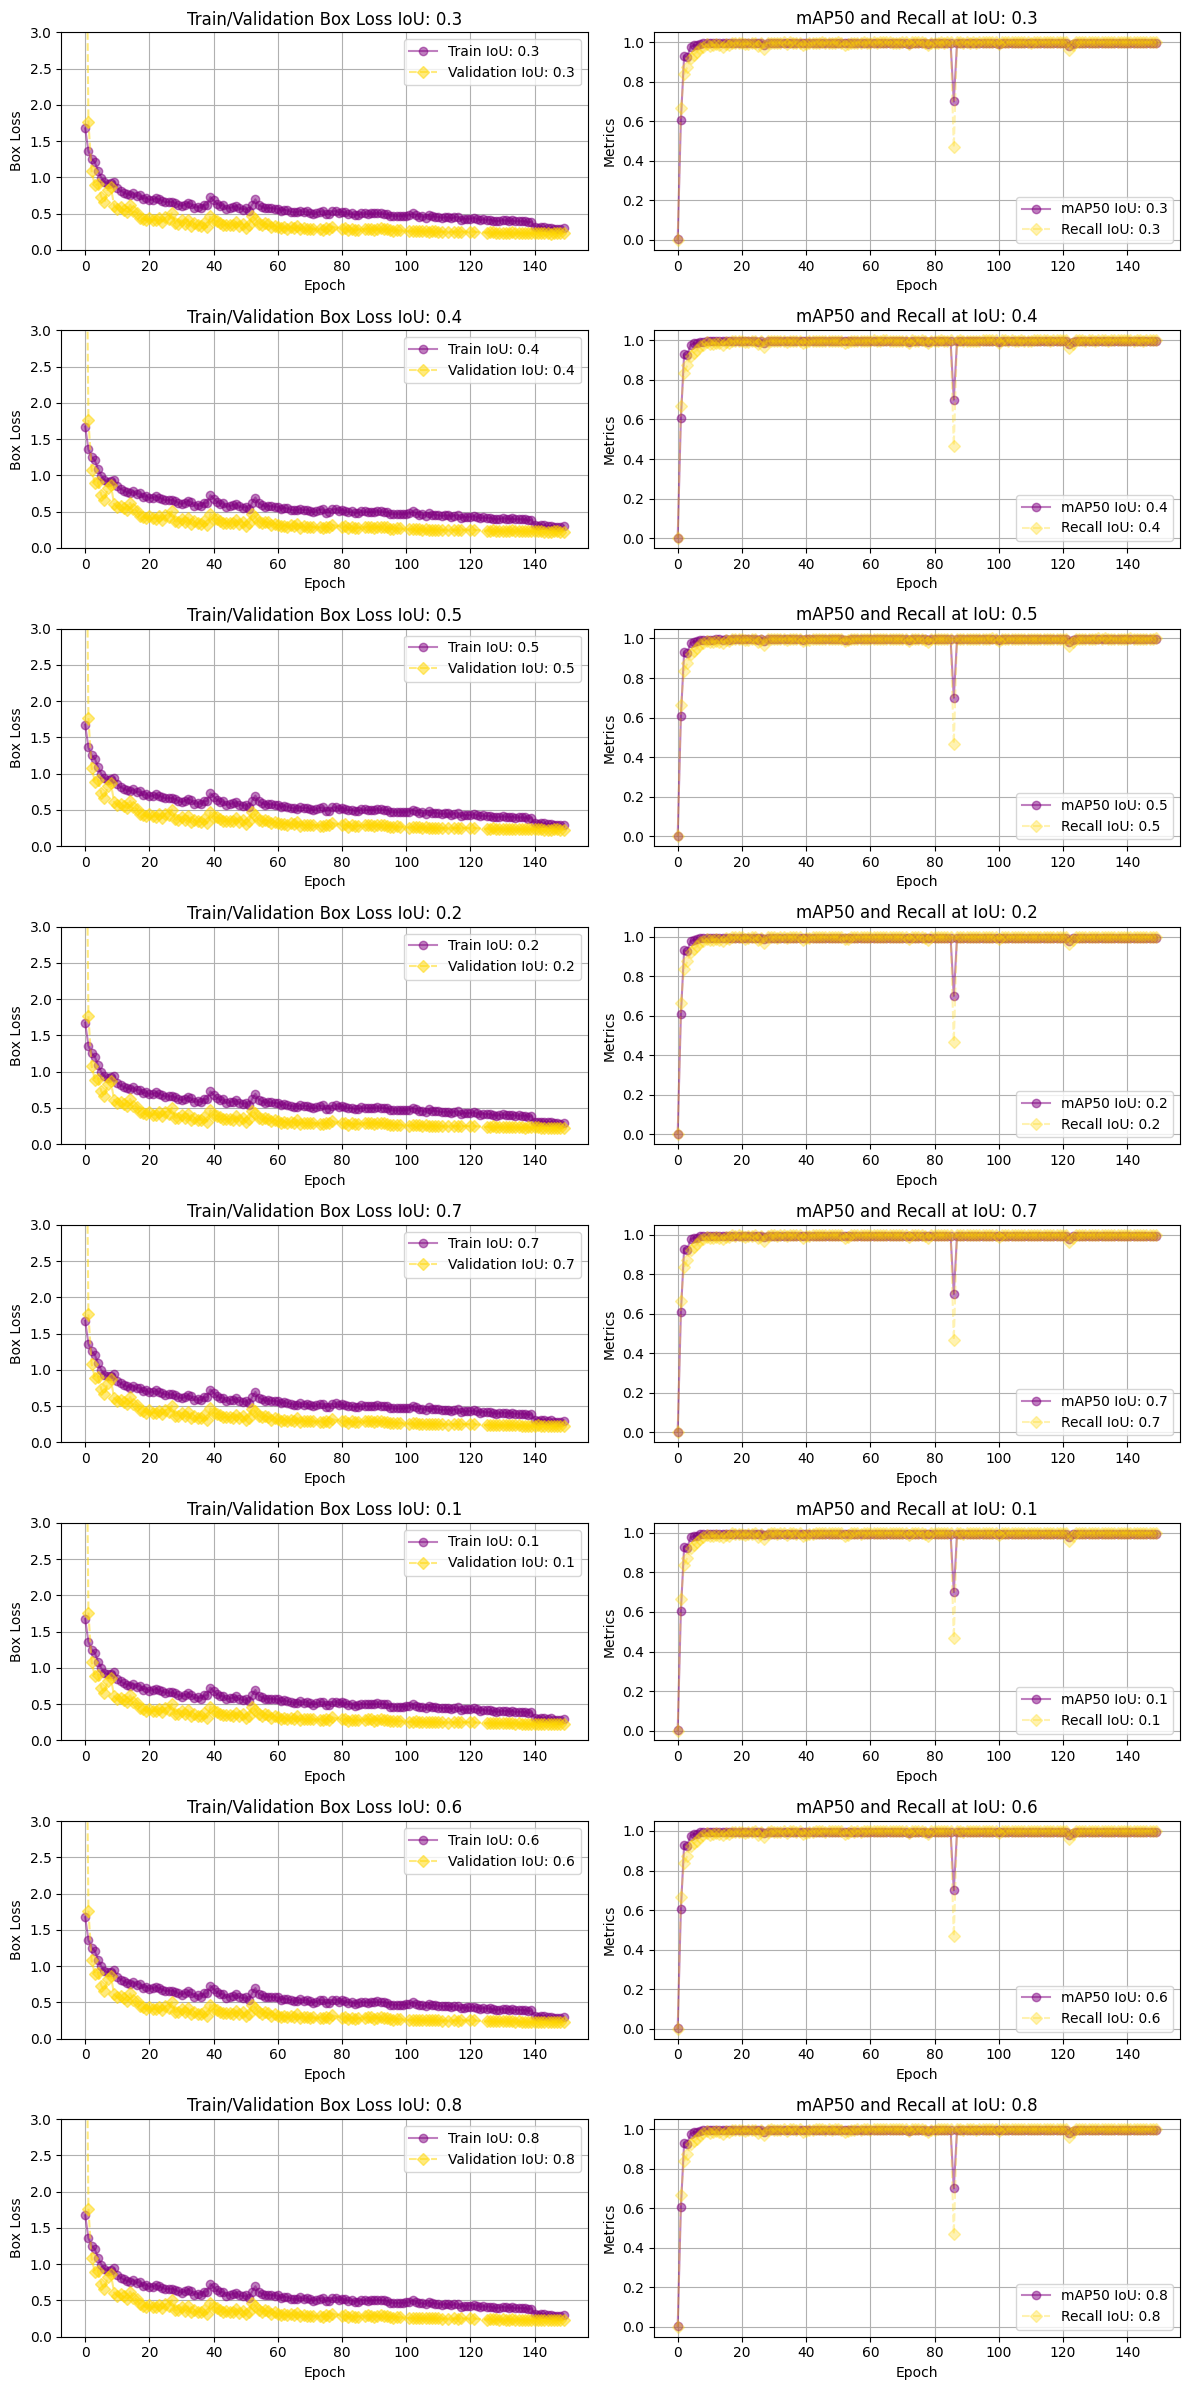

Best model based on lowest validation box loss: AdamW_training/AdamW_150_0.3 with loss 0.2238
Best model based on highest mAP50: AdamW_training/AdamW_150_0.3 with mAP50 0.995


In [9]:

import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the folders
folders = [f"AdamW_training/{folder}" for folder in os.listdir("AdamW_training") if "AdamW_150" in folder]
#folders = ['AdamW_training/AdamW_50_0.1', 'AdamW_training/AdamW_50_0.2', 'AdamW_training/AdamW_50_0.3', 'AdamW_training/AdamW_50_0.4', 'AdamW_training/AdamW_50_0.5', 'AdamW_training/AdamW_50_0.6', 'AdamW_training/AdamW_50_0.7', 'AdamW_training/AdamW_50_0.8']

# Initialize a plot with subplots
fig, axes = plt.subplots(len(folders), 2, figsize=(12, 3 * len(folders)))

# Define markers for different folders
#markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p']

# Track the best model
best_model_loss = {'folder': None, 'value': float('inf')}
best_model_map50 = {'folder': None, 'value': float('-inf')}

# Iterate over each folder and plot the box_loss and mAP50
for i, folder in enumerate(folders):
    csv_path = os.path.join(folder, 'results.csv')
    if os.path.exists(csv_path):
        # Read the CSV file
        df = pd.read_csv(csv_path)
        
        # Extract relevant columns
        train_box_loss = df['train/box_loss'].dropna()
        val_box_loss = df['val/box_loss'].dropna()
        train_map50 = df['metrics/mAP50(B)'].dropna()
        recall = df['metrics/recall(B)'].dropna()
        
        # Extract the IoU value from the folder name
        iou = folder.split('_')[-1]
        
        # Plot train and val box loss
        axes[i, 0].plot(train_box_loss, marker="o", label=f'Train IoU: {iou}', linestyle='-', color='purple', alpha=0.5)
        axes[i, 0].plot(val_box_loss, marker="D", label=f'Validation IoU: {iou}', linestyle='--', color='gold', alpha=0.5)
        axes[i, 0].set_title(f'Train/Validation Box Loss IoU: {iou}')
        axes[i, 0].set_xlabel('Epoch')
        axes[i, 0].set_ylabel('Box Loss')
        axes[i, 0].legend()
        axes[i, 0].grid(True)
        axes[i, 0].set_ylim(0, 3)
        
        # Plot train and val mAP50
        axes[i, 1].plot(train_map50, marker="o", label=f'mAP50 IoU: {iou}', linestyle='-', color='purple', alpha=0.5)
        axes[i, 1].plot(recall, marker="D", label=f'Recall IoU: {iou}', linestyle='--', color='gold', alpha=0.3)
        axes[i, 1].set_title(f'mAP50 and Recall at IoU: {iou}')
        axes[i, 1].set_xlabel('Epoch')
        axes[i, 1].set_ylabel('Metrics')
        axes[i, 1].legend()
        axes[i, 1].grid(True)

        # Update best model tracking
        min_val_box_loss = val_box_loss.min()
        max_map50 = train_map50.max()
        
        if min_val_box_loss < best_model_loss['value']:
            best_model_loss['value'] = min_val_box_loss
            best_model_loss['folder'] = folder
        
        if max_map50 > best_model_map50['value']:
            best_model_map50['value'] = max_map50
            best_model_map50['folder'] = folder

# Adjust layout
plt.tight_layout()

# Save and show the plot
#plt.savefig('train_val_boxloss_map50recall_plot_AdamW150.png')
plt.show()

# Print the best models
print(f"Best model based on lowest validation box loss: {best_model_loss['folder']} with loss {best_model_loss['value']}")
print(f"Best model based on highest mAP50: {best_model_map50['folder']} with mAP50 {best_model_map50['value']}")

# Best based on Box loss
# 50: Best model based on lowest validation box loss: AdamW_training/AdamW_50_0.1 with loss 0.25551
# Best model based on highest mAP50: AdamW_training/AdamW_50_0.7 with mAP50 0.995

# 100:
# Best model based on lowest validation box loss: AdamW_training/AdamW_100_0.7 with loss 0.24474
# Best model based on highest mAP50: AdamW_training/AdamW_100_0.7 with mAP50 0.995

# 150
# Best model based on lowest validation box loss: AdamW_training/AdamW_150_0.3 with loss 0.2238
# Best model based on highest mAP50: AdamW_training/AdamW_150_0.3 with mAP50 0.995

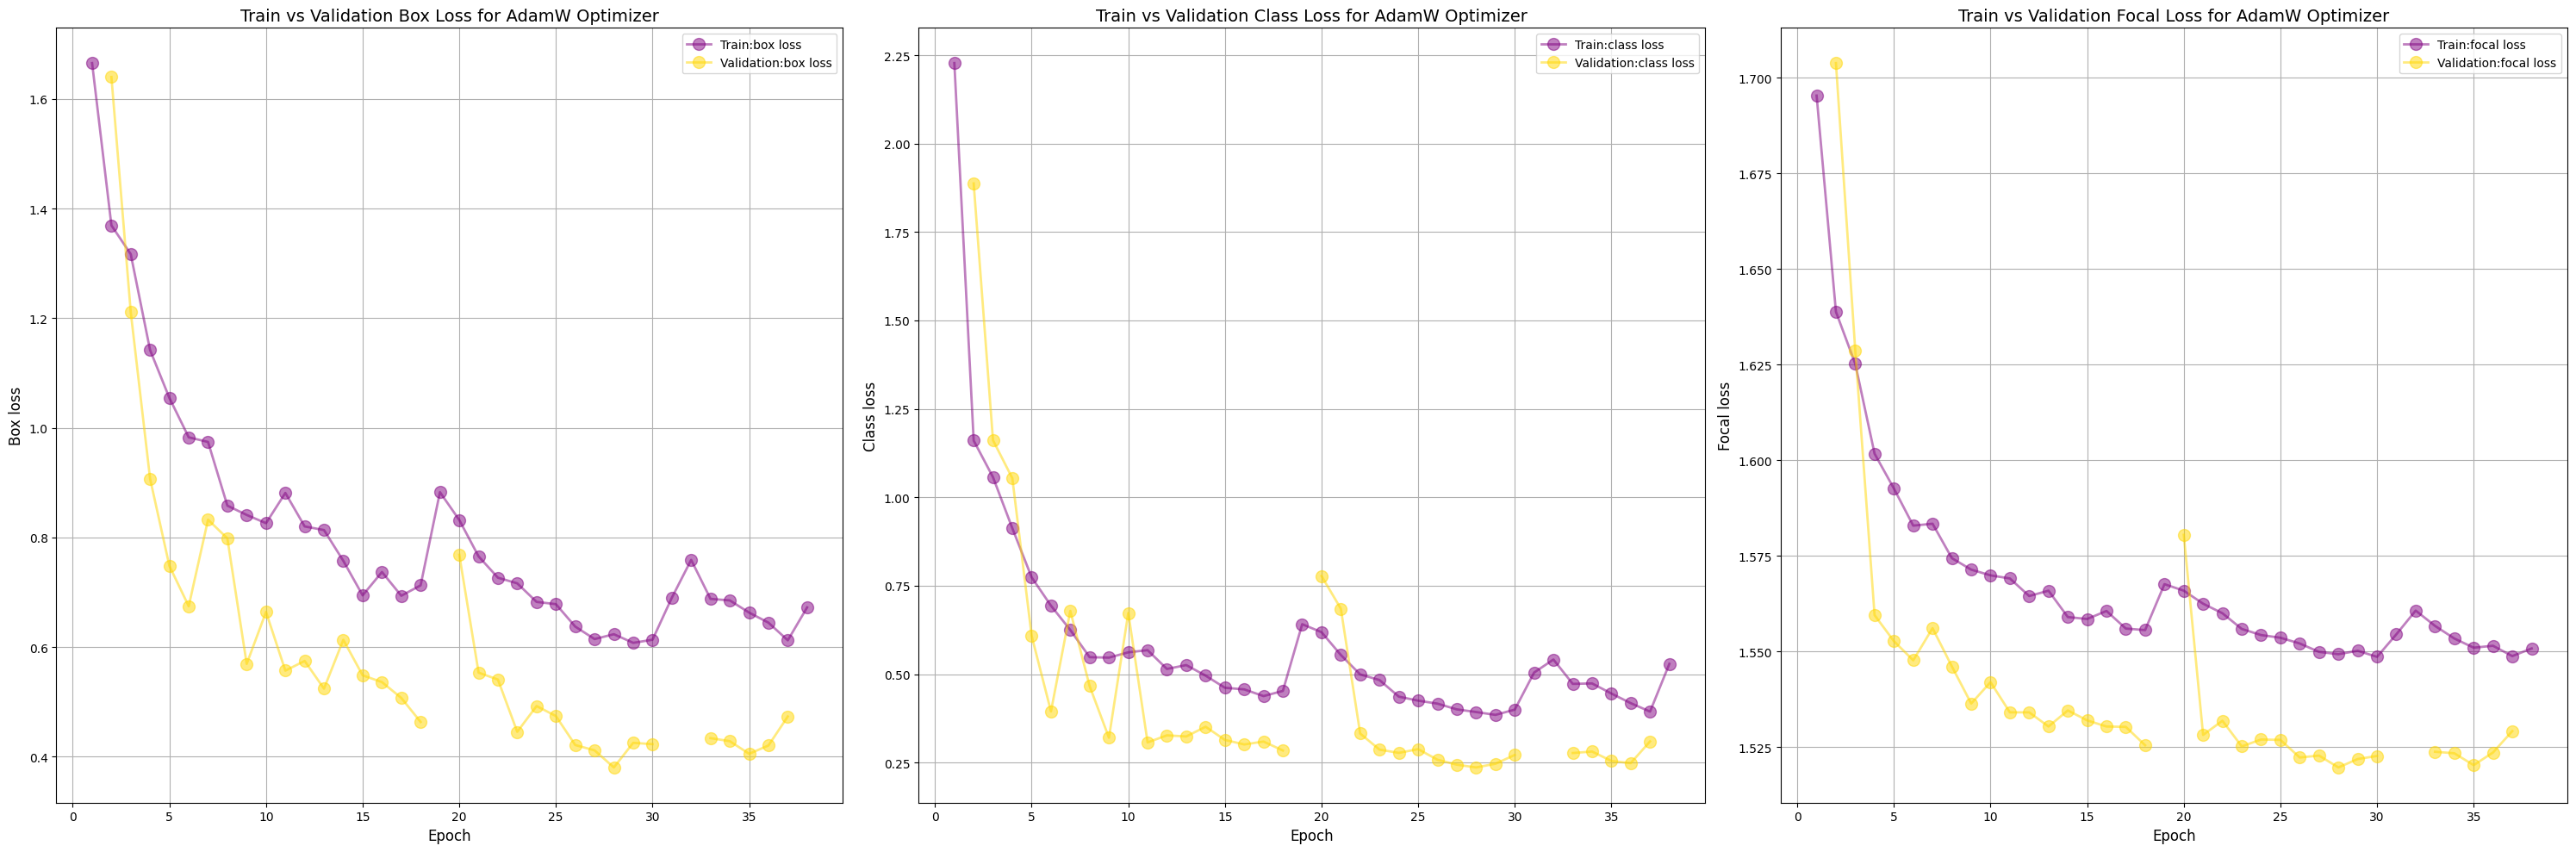

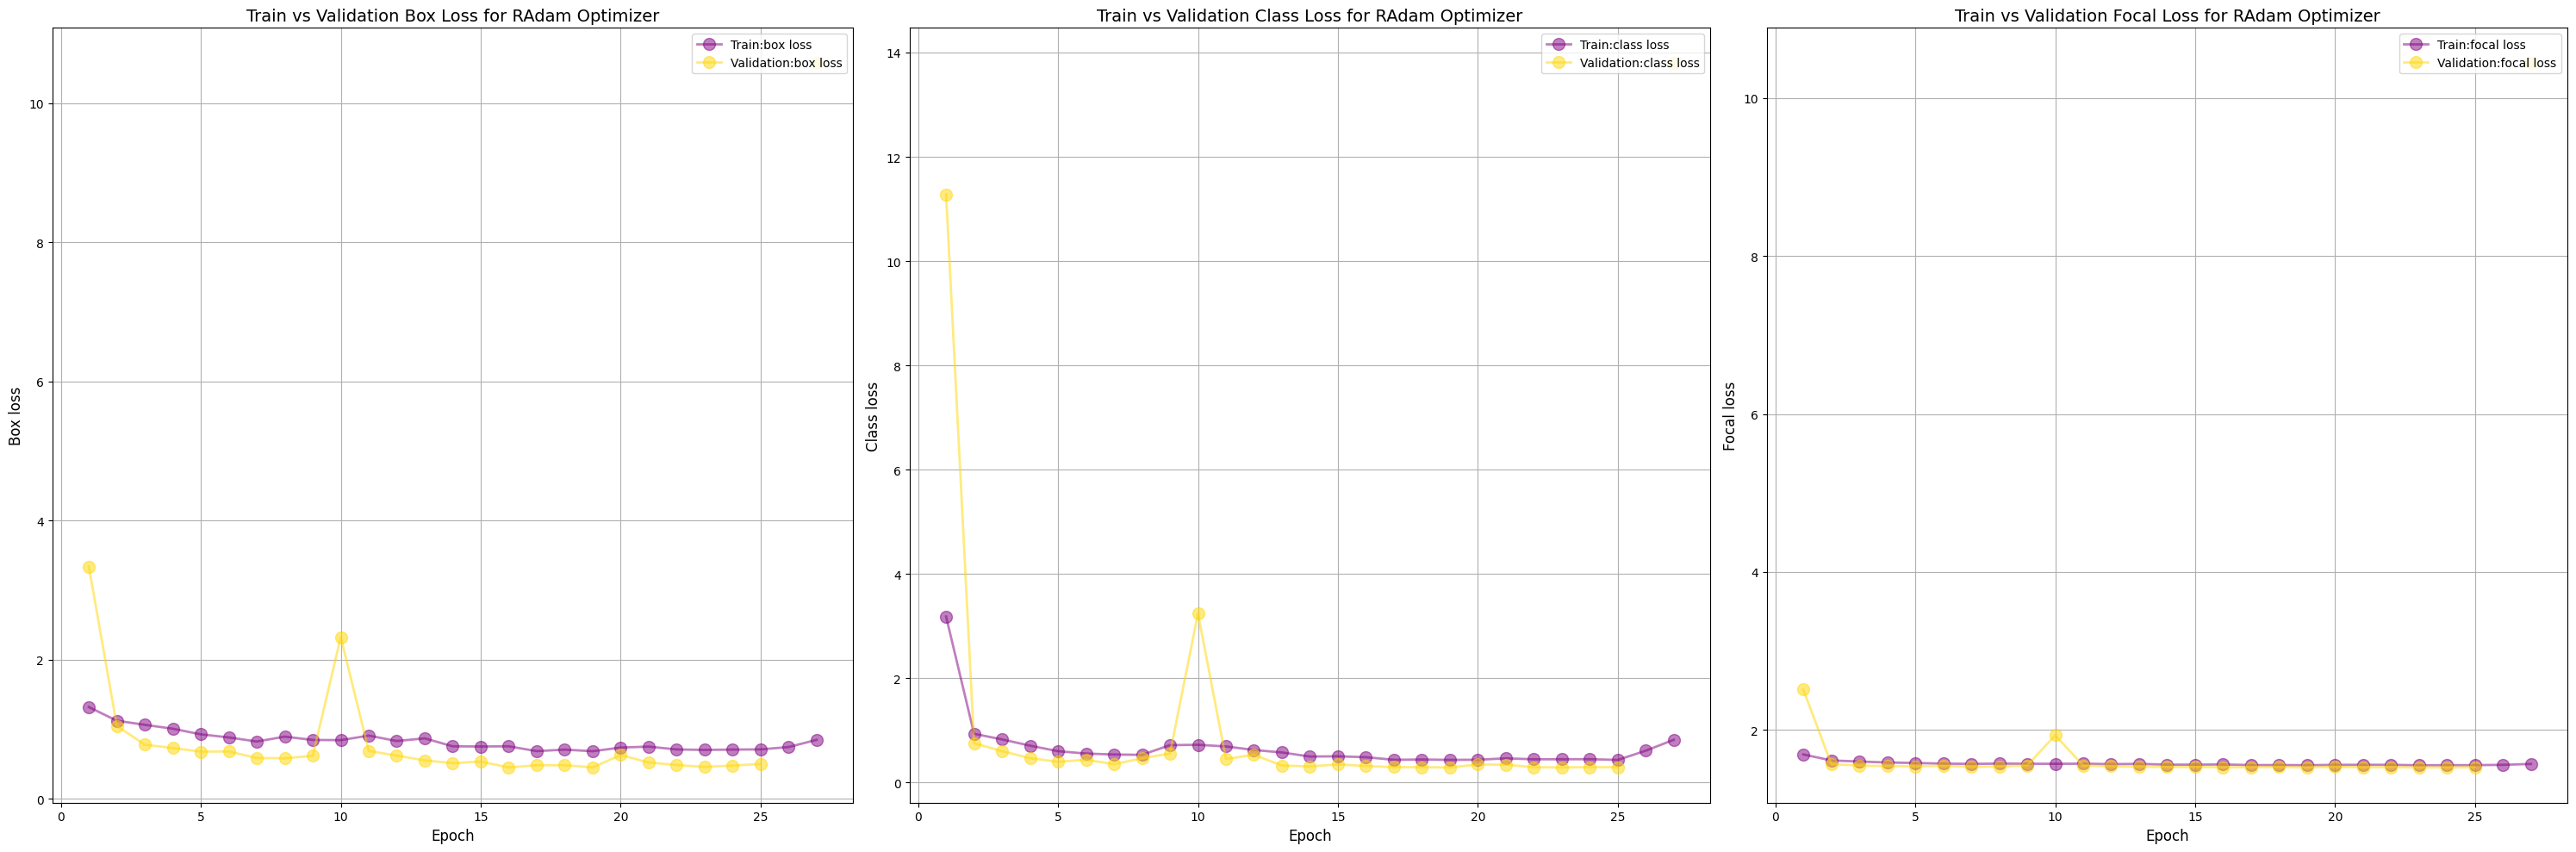

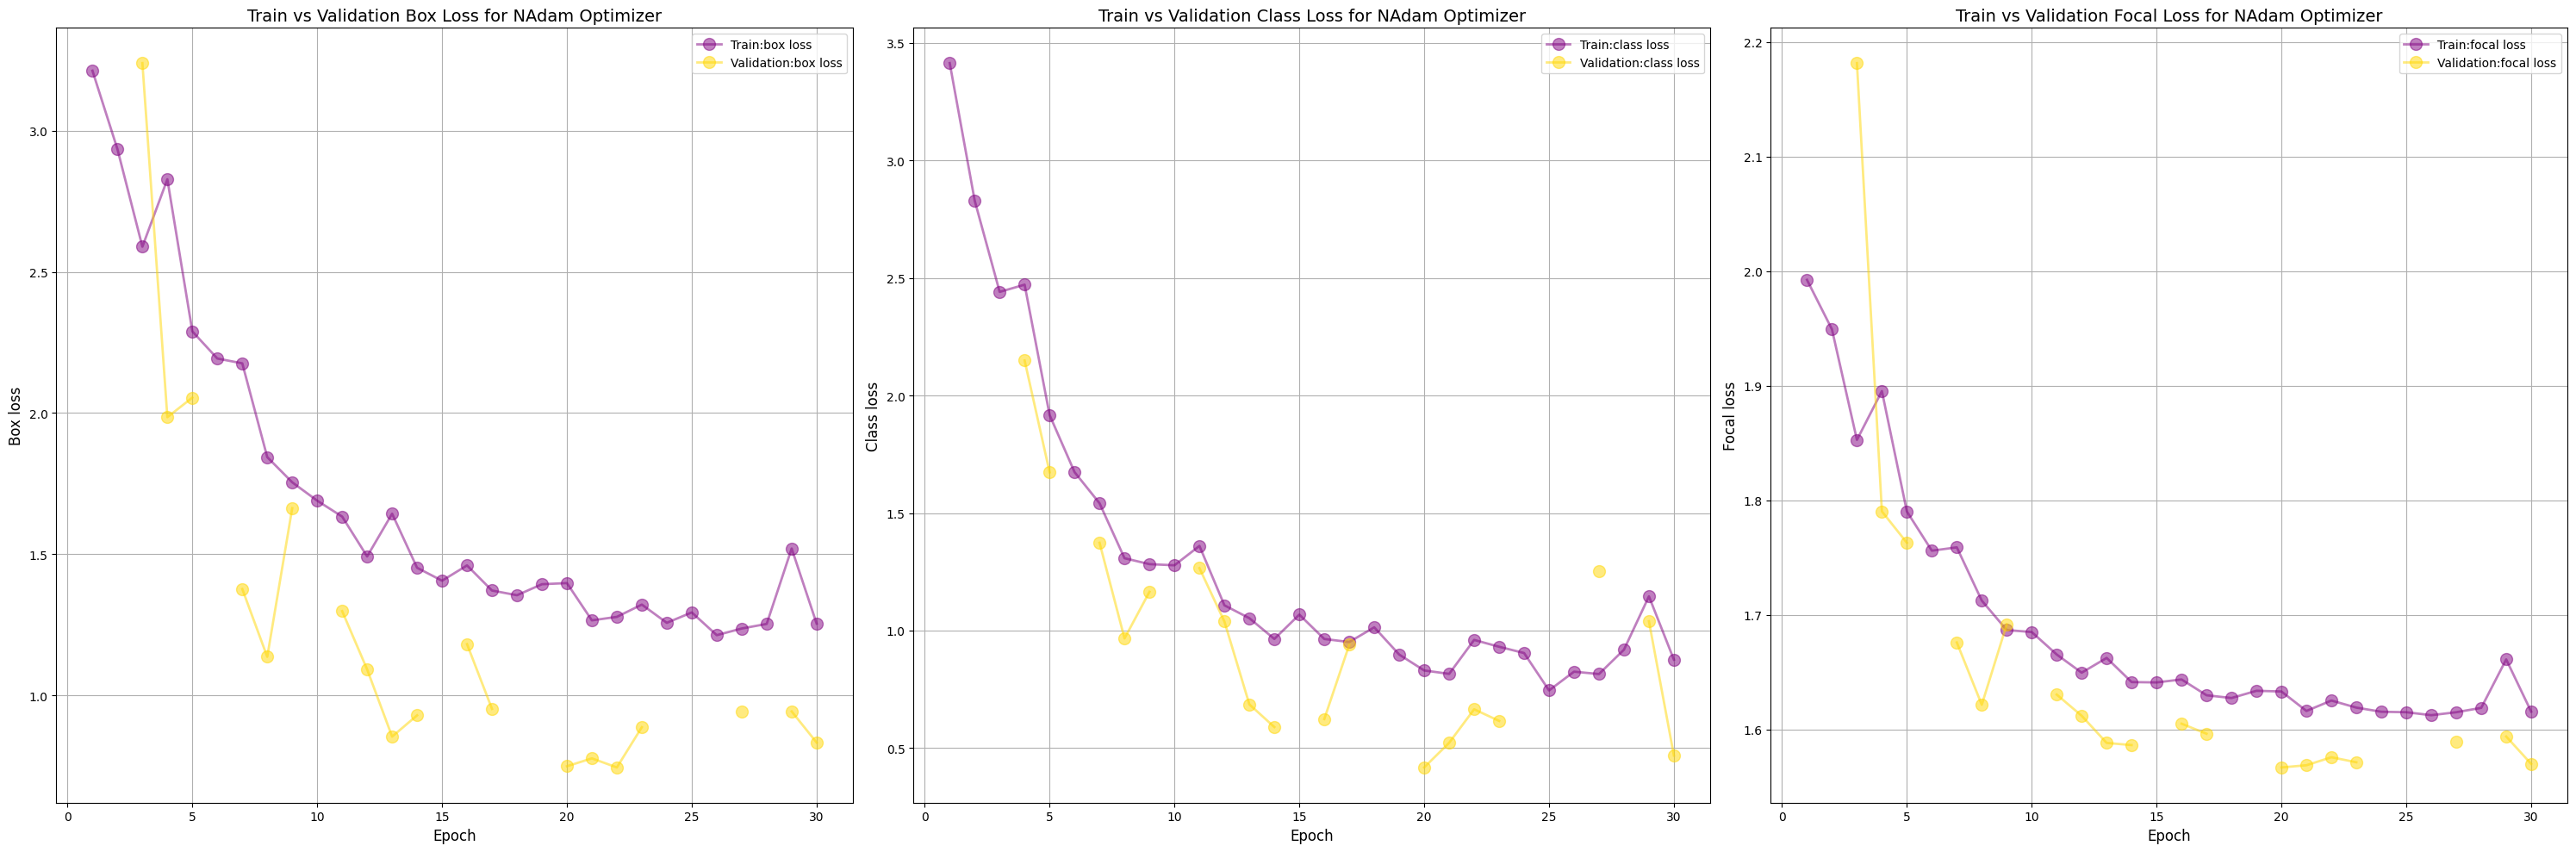

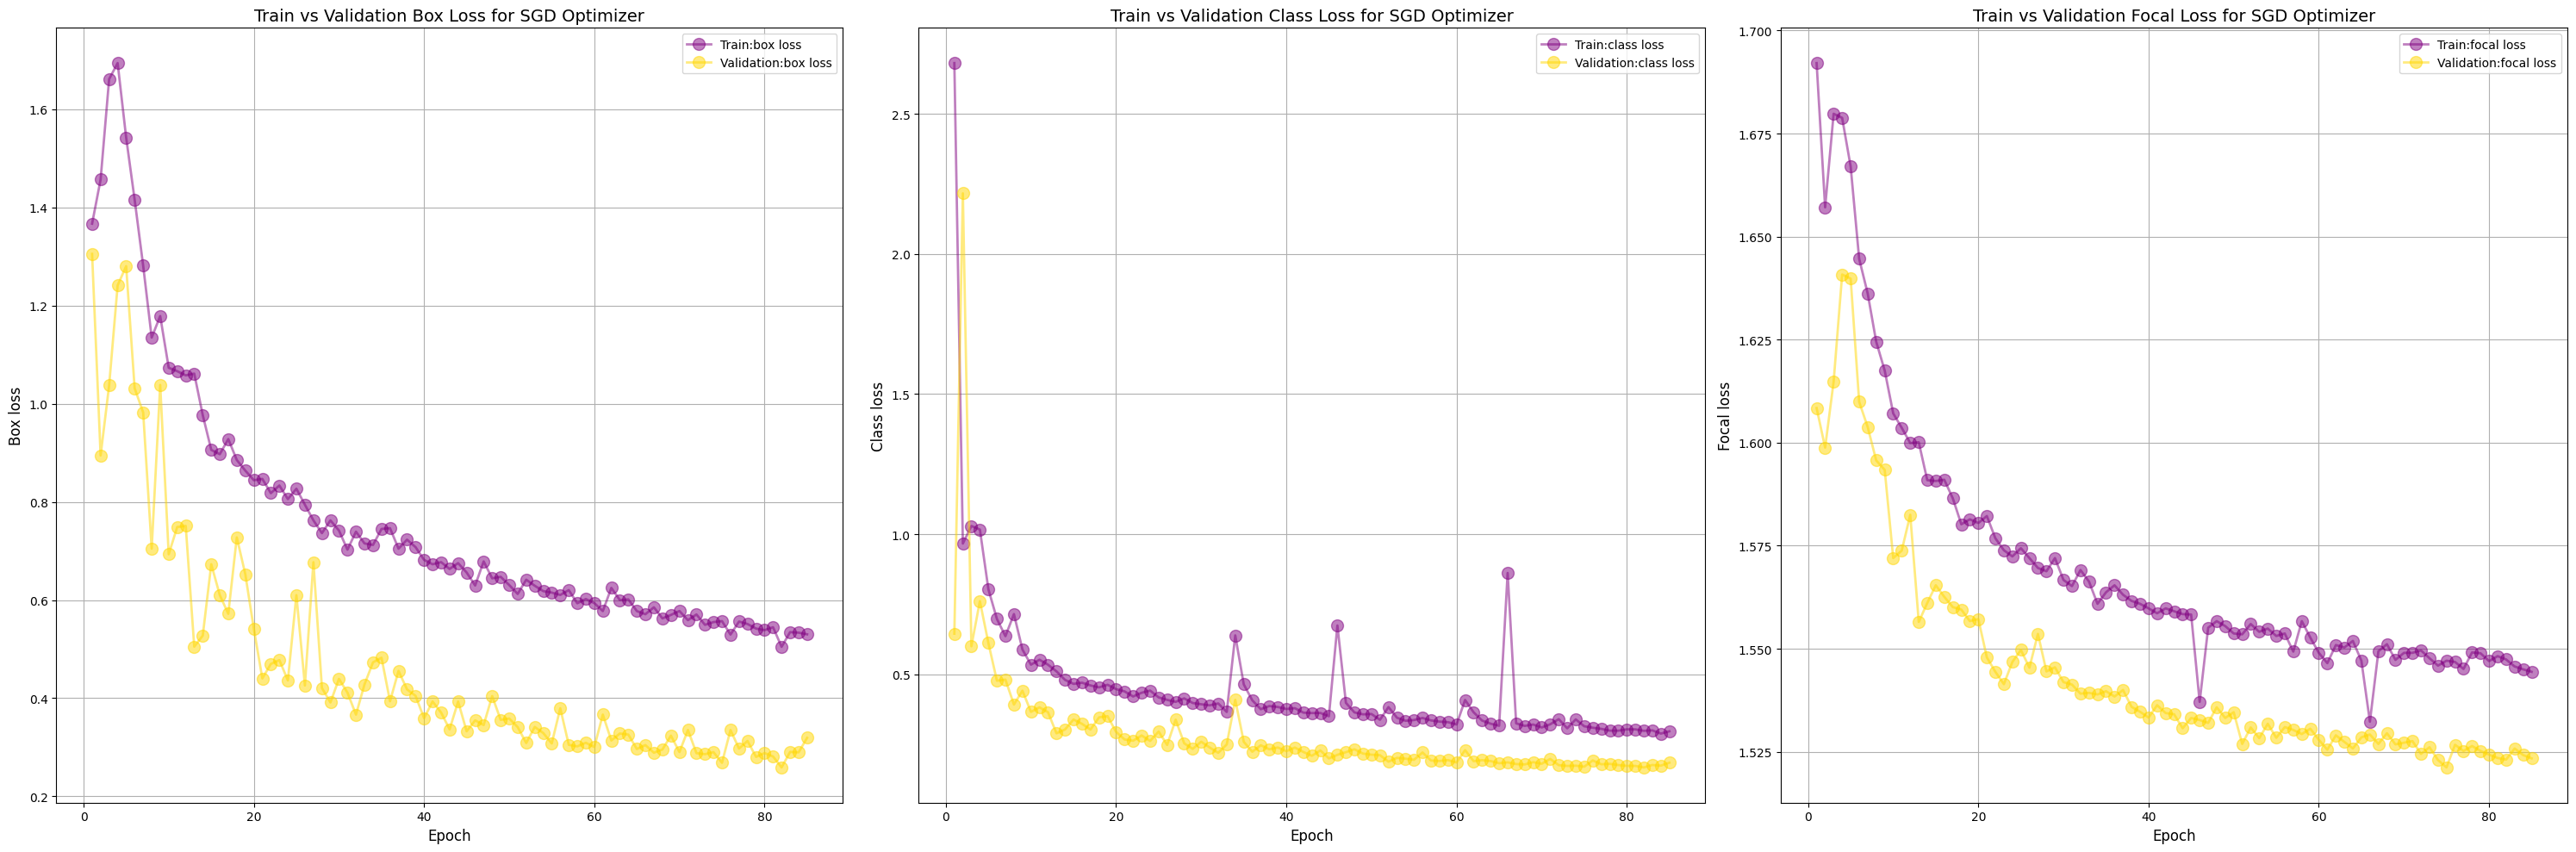

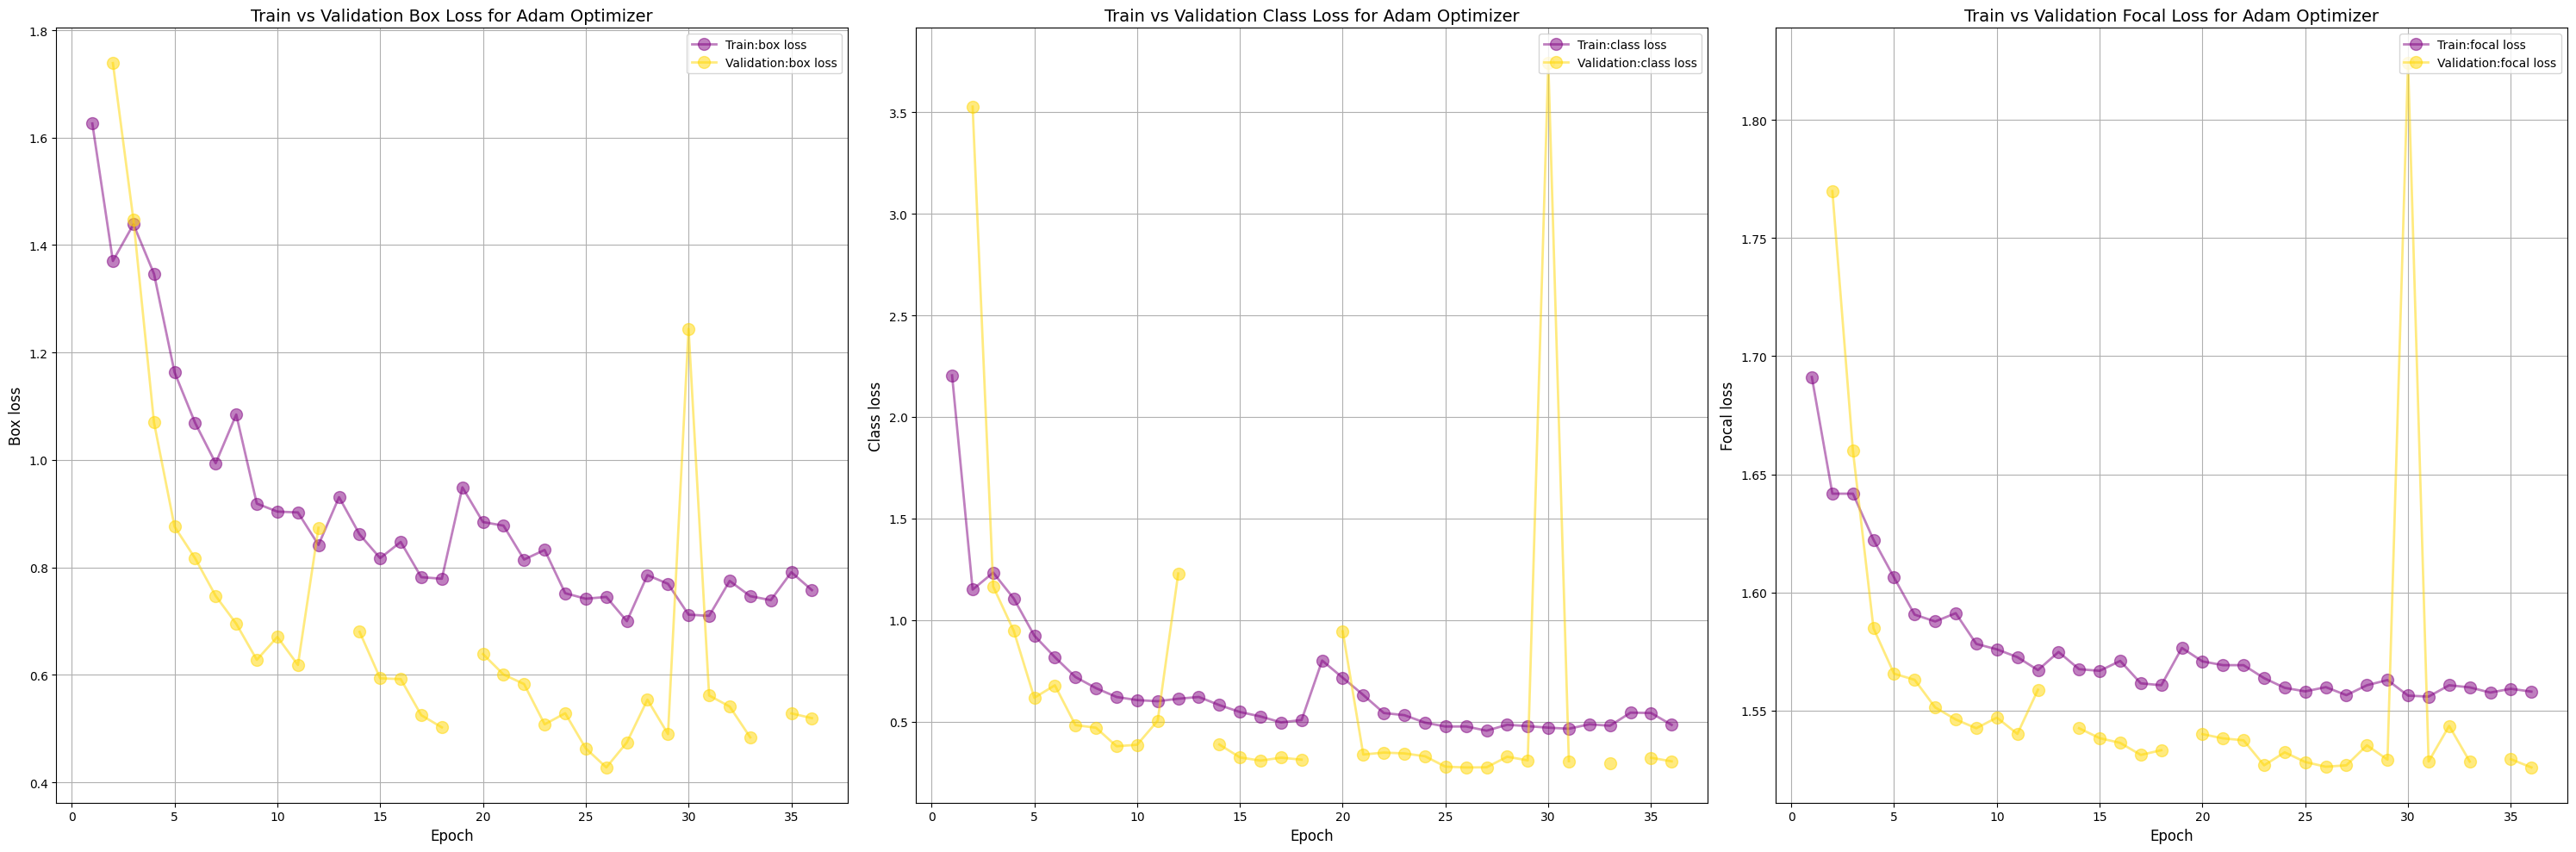

In [24]:
# Optimizer selection

#3 plots in one frame for different losses
for folder in ['AdamW', 'RAdam', 'NAdam', 'SGD', 'Adam']:
    df = pd.read_csv(f"{folder}/results.csv")
    fig, axes = plt.subplots(1,3, figsize=(30, 10))
    axes[0].plot(df.epoch, df['train/box_loss'], 'o-', markersize=10, label='Train:box loss', alpha=0.5, color='purple', linewidth=2)
    axes[0].plot(df.epoch, df['val/box_loss'], 'o-', markersize=10, label='Validation:box loss', alpha=0.5, color='gold', linewidth=2)
    axes[0].legend(loc="upper right")
    axes[0].set_title(f'Train vs Validation Box Loss for {folder} Optimizer', fontsize=14)
    axes[0].set_xlabel("Epoch", fontsize=12)
    axes[0].set_ylabel("Box loss", fontsize=12)
    axes[0].grid(True)

    axes[1].plot(df.epoch, df['train/cls_loss'], 'o-', markersize=10, label='Train:class loss', alpha=0.5, color='purple', linewidth=2)
    axes[1].plot(df.epoch, df['val/cls_loss'], 'o-', markersize=10, label='Validation:class loss', alpha=0.5, color='gold', linewidth=2)
    axes[1].legend(loc="upper right")
    axes[1].set_title(f'Train vs Validation Class Loss for {folder} Optimizer', fontsize=14)
    axes[1].set_xlabel("Epoch", fontsize=12)
    axes[1].set_ylabel("Class loss", fontsize=12)
    axes[1].grid(True)

    axes[2].plot(df.epoch, df['train/dfl_loss'], 'o-', markersize=10, label='Train:focal loss', alpha=0.5, color='purple', linewidth=2)
    axes[2].plot(df.epoch, df['val/dfl_loss'], 'o-', markersize=10, label='Validation:focal loss', alpha=0.5, color='gold', linewidth=2)
    axes[2].legend(loc="upper right")
    axes[2].set_title(f'Train vs Validation Focal Loss for {folder} Optimizer', fontsize=14)
    axes[2].set_xlabel("Epoch", fontsize=12)
    axes[2].set_ylabel("Focal loss", fontsize=12)
    axes[2].grid(True)


    plt.tight_layout()
    plt.savefig(f"{folder}/losses.png", dpi=300)

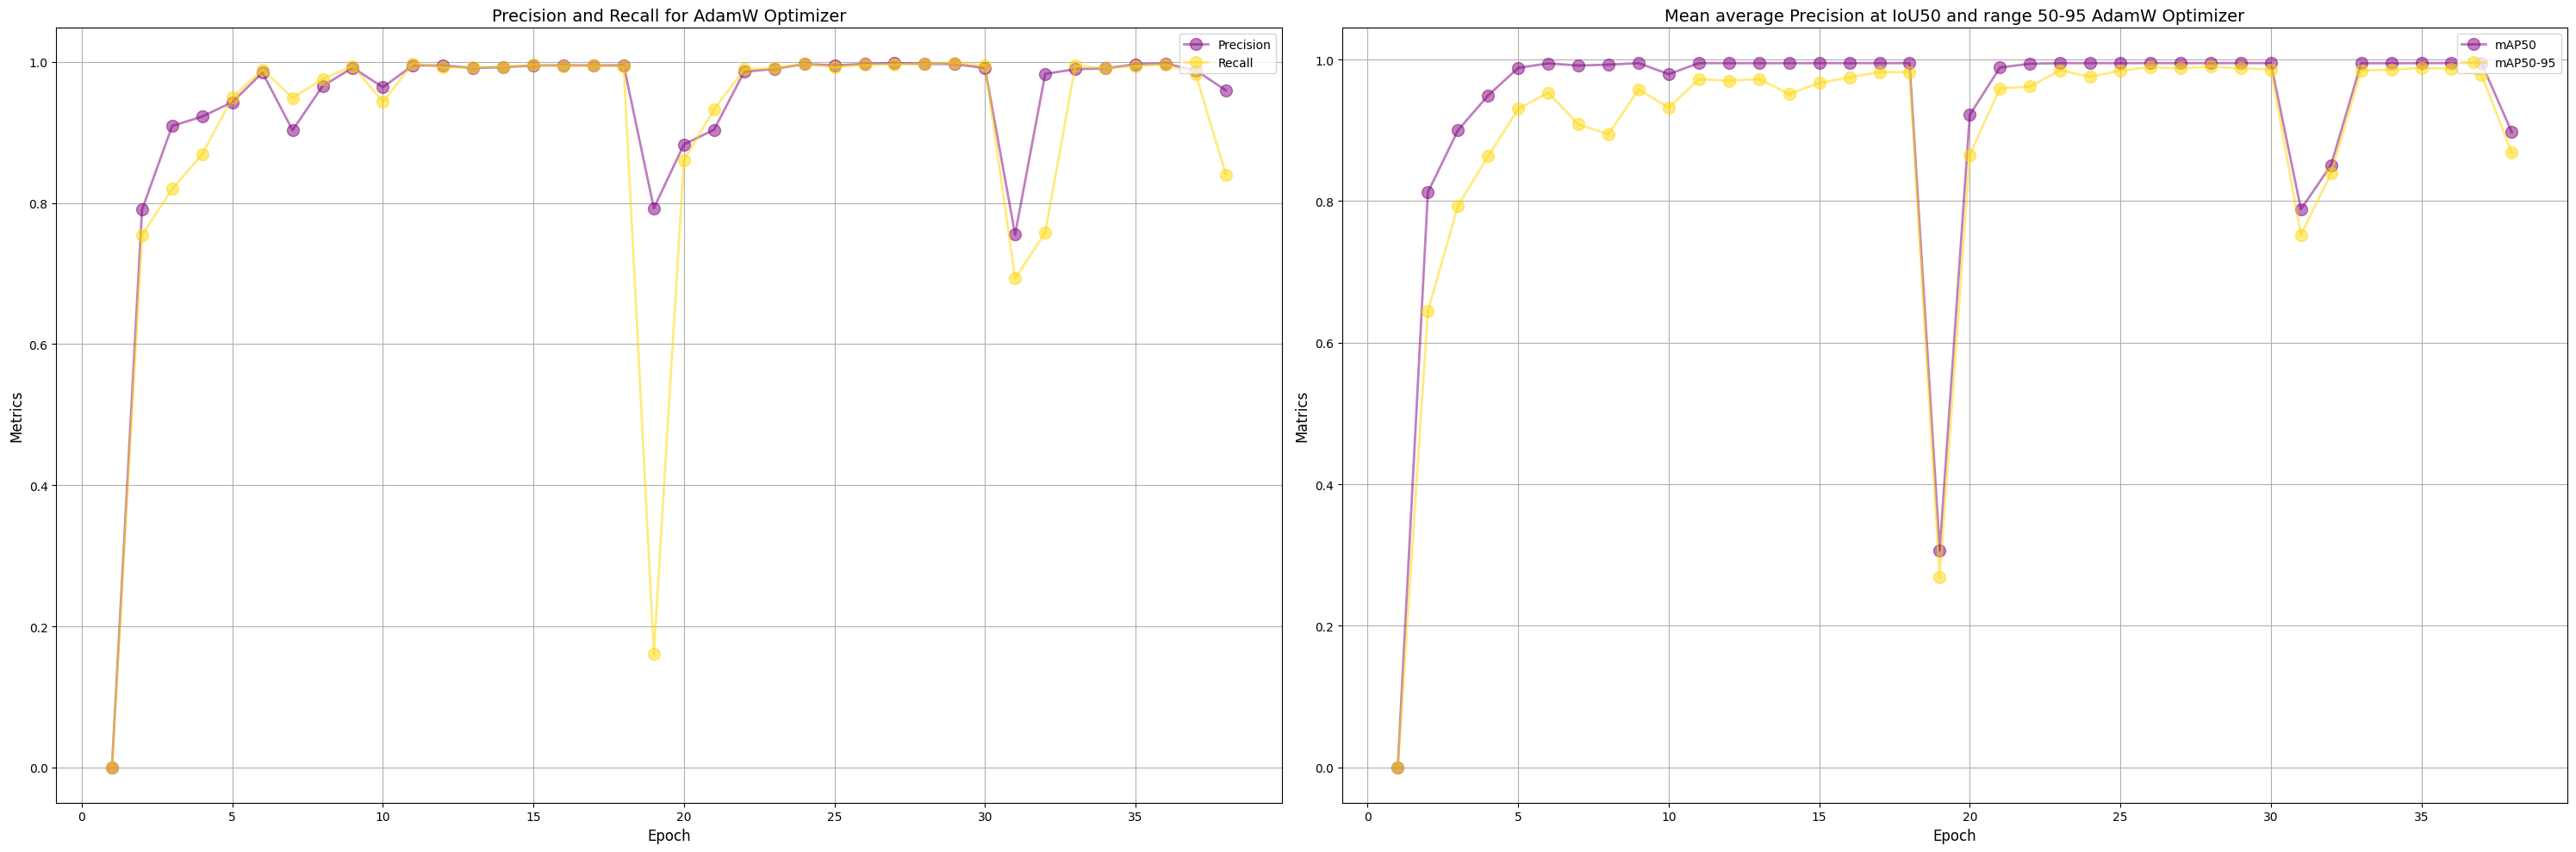

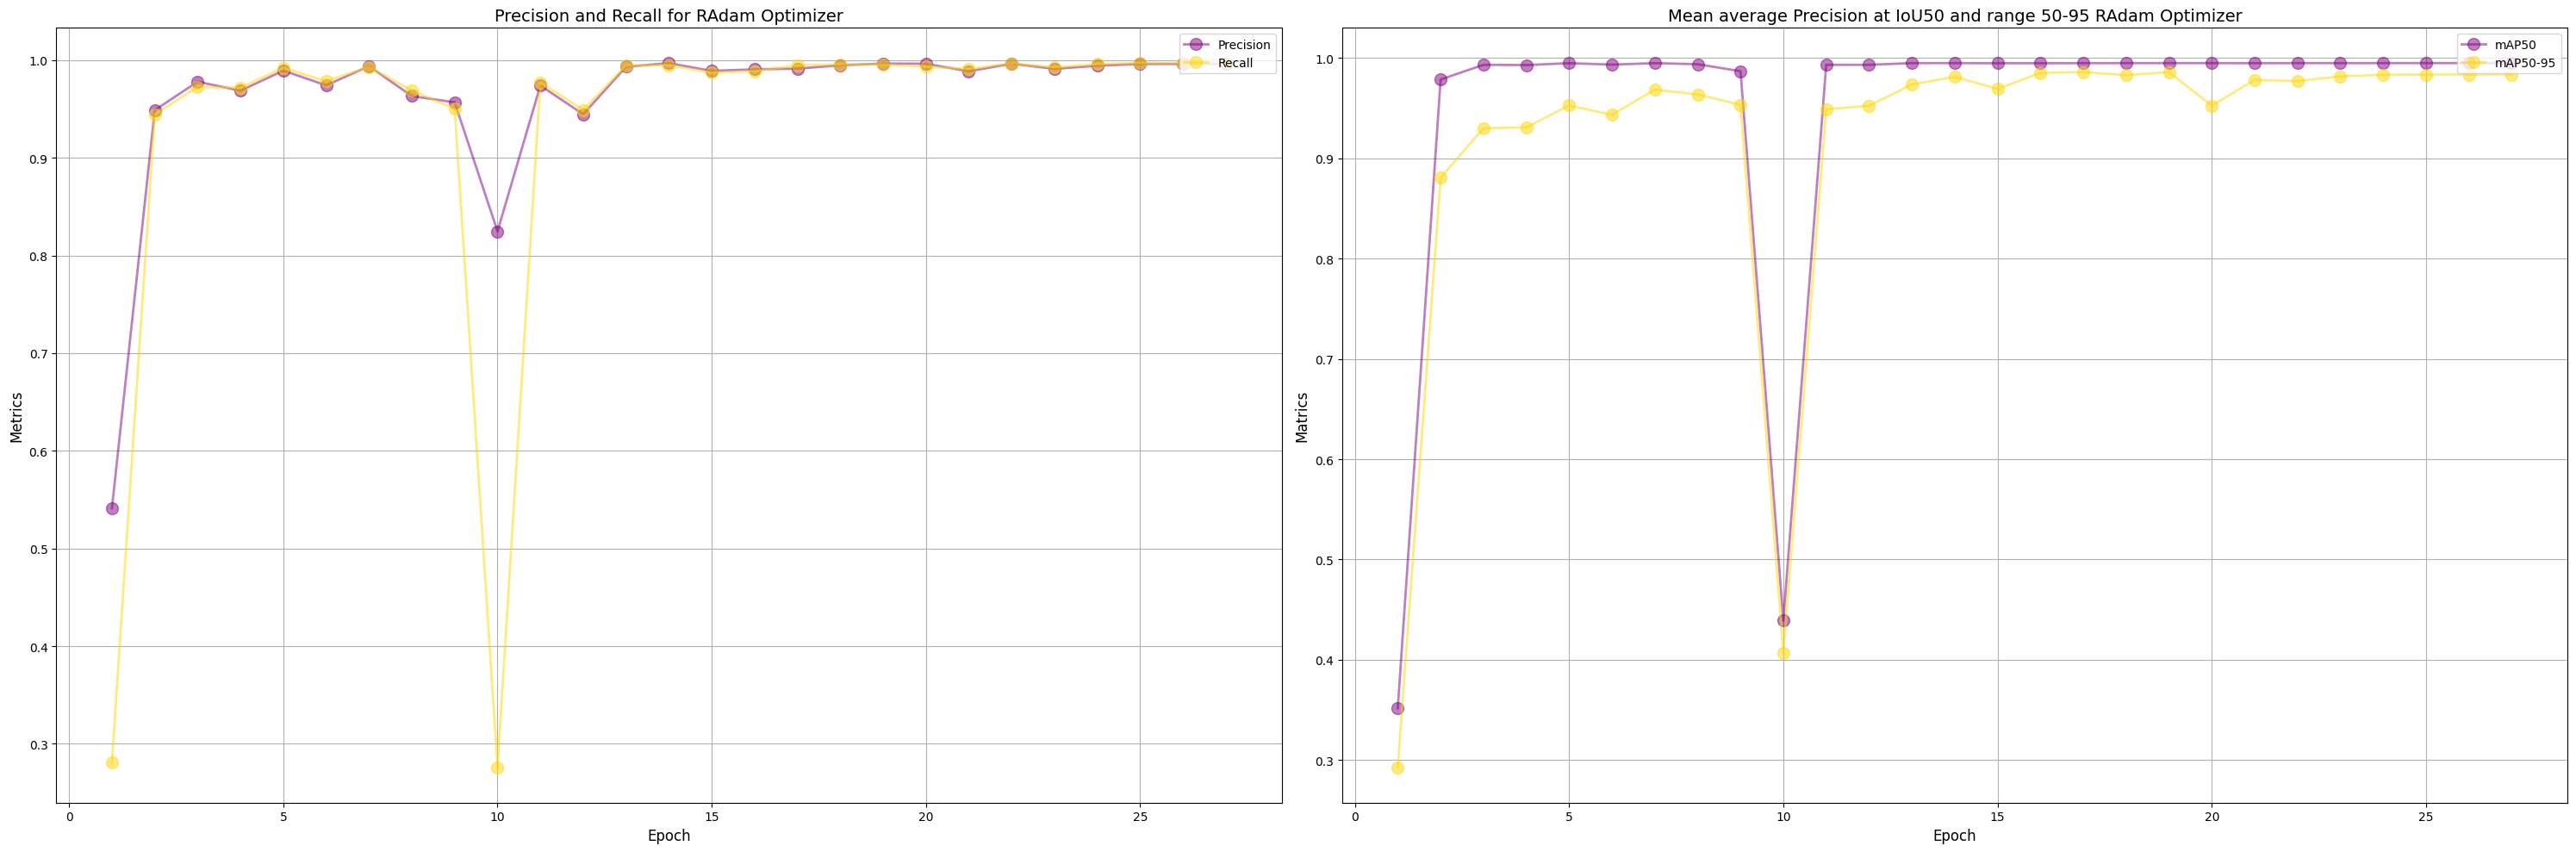

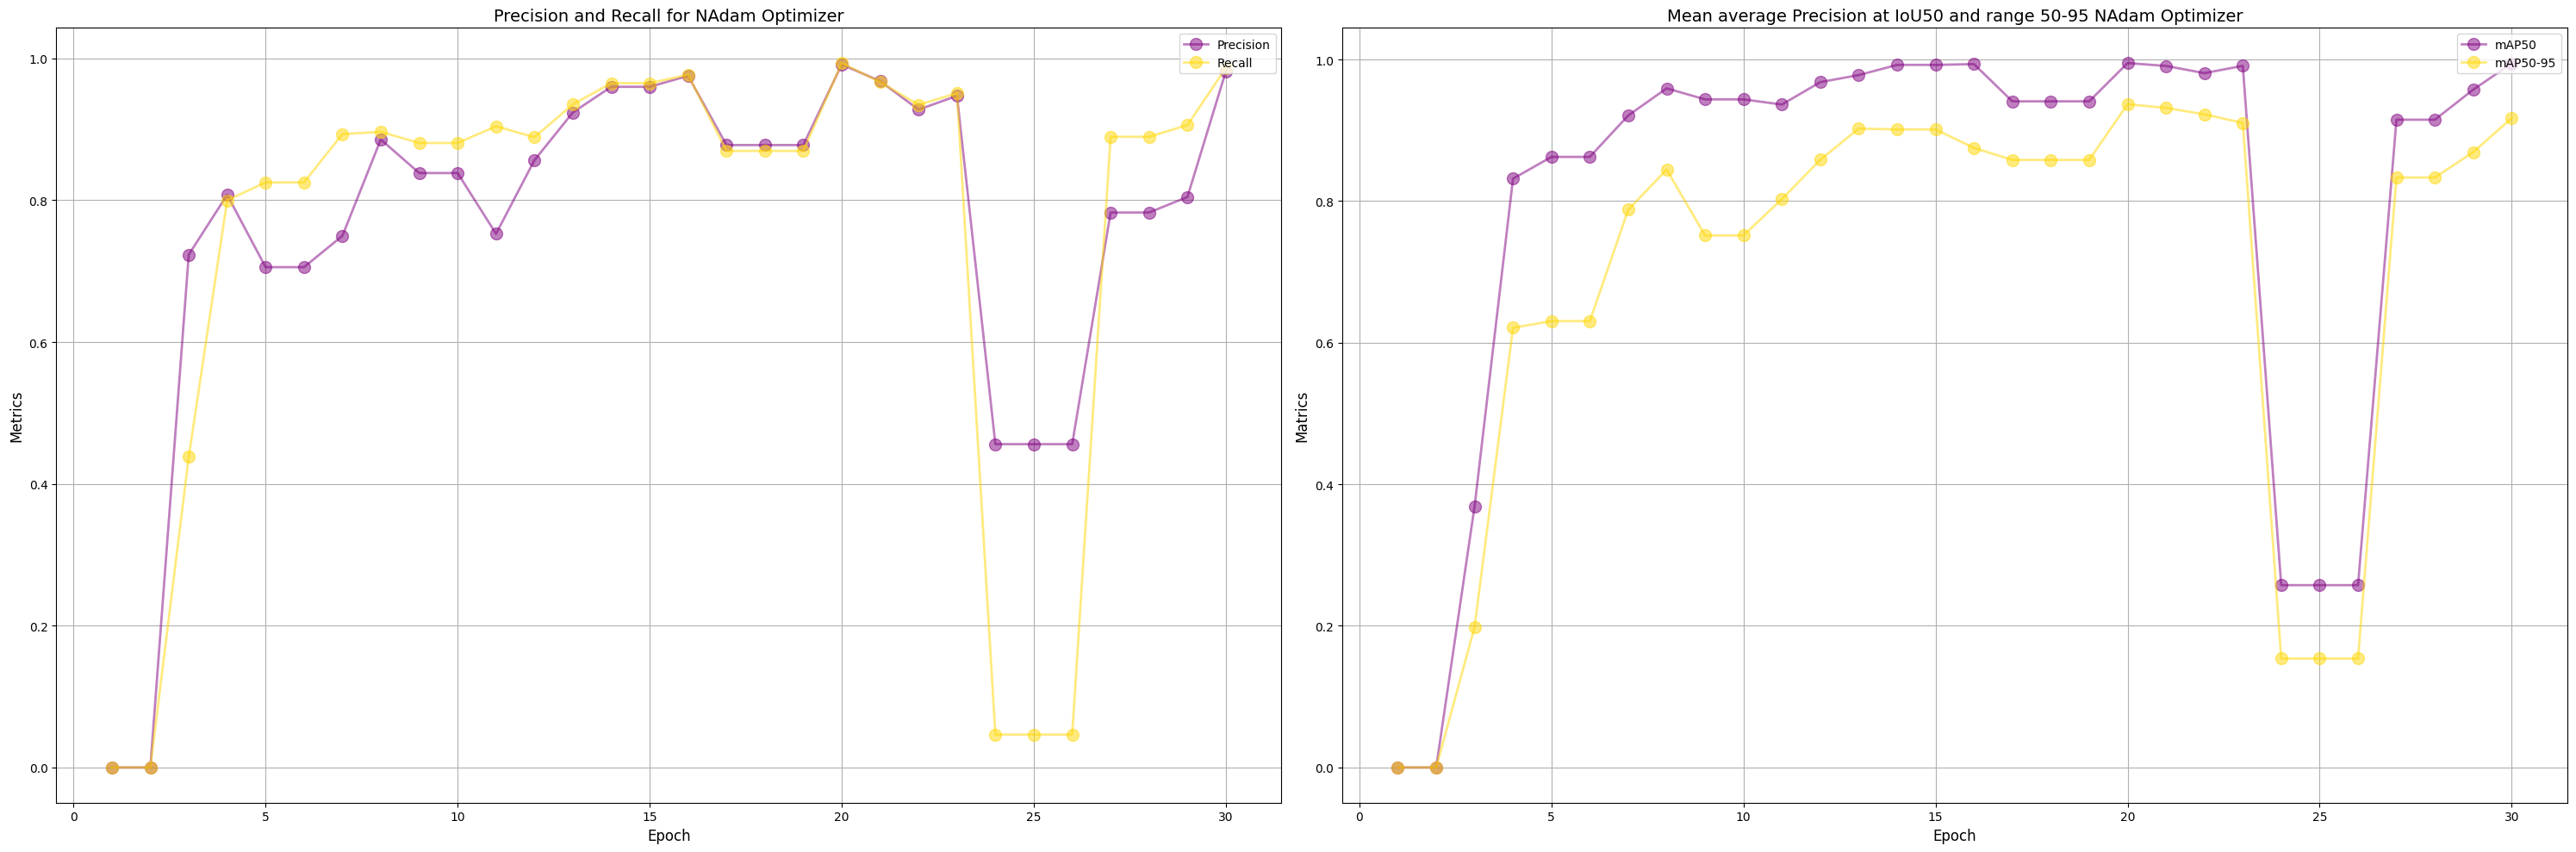

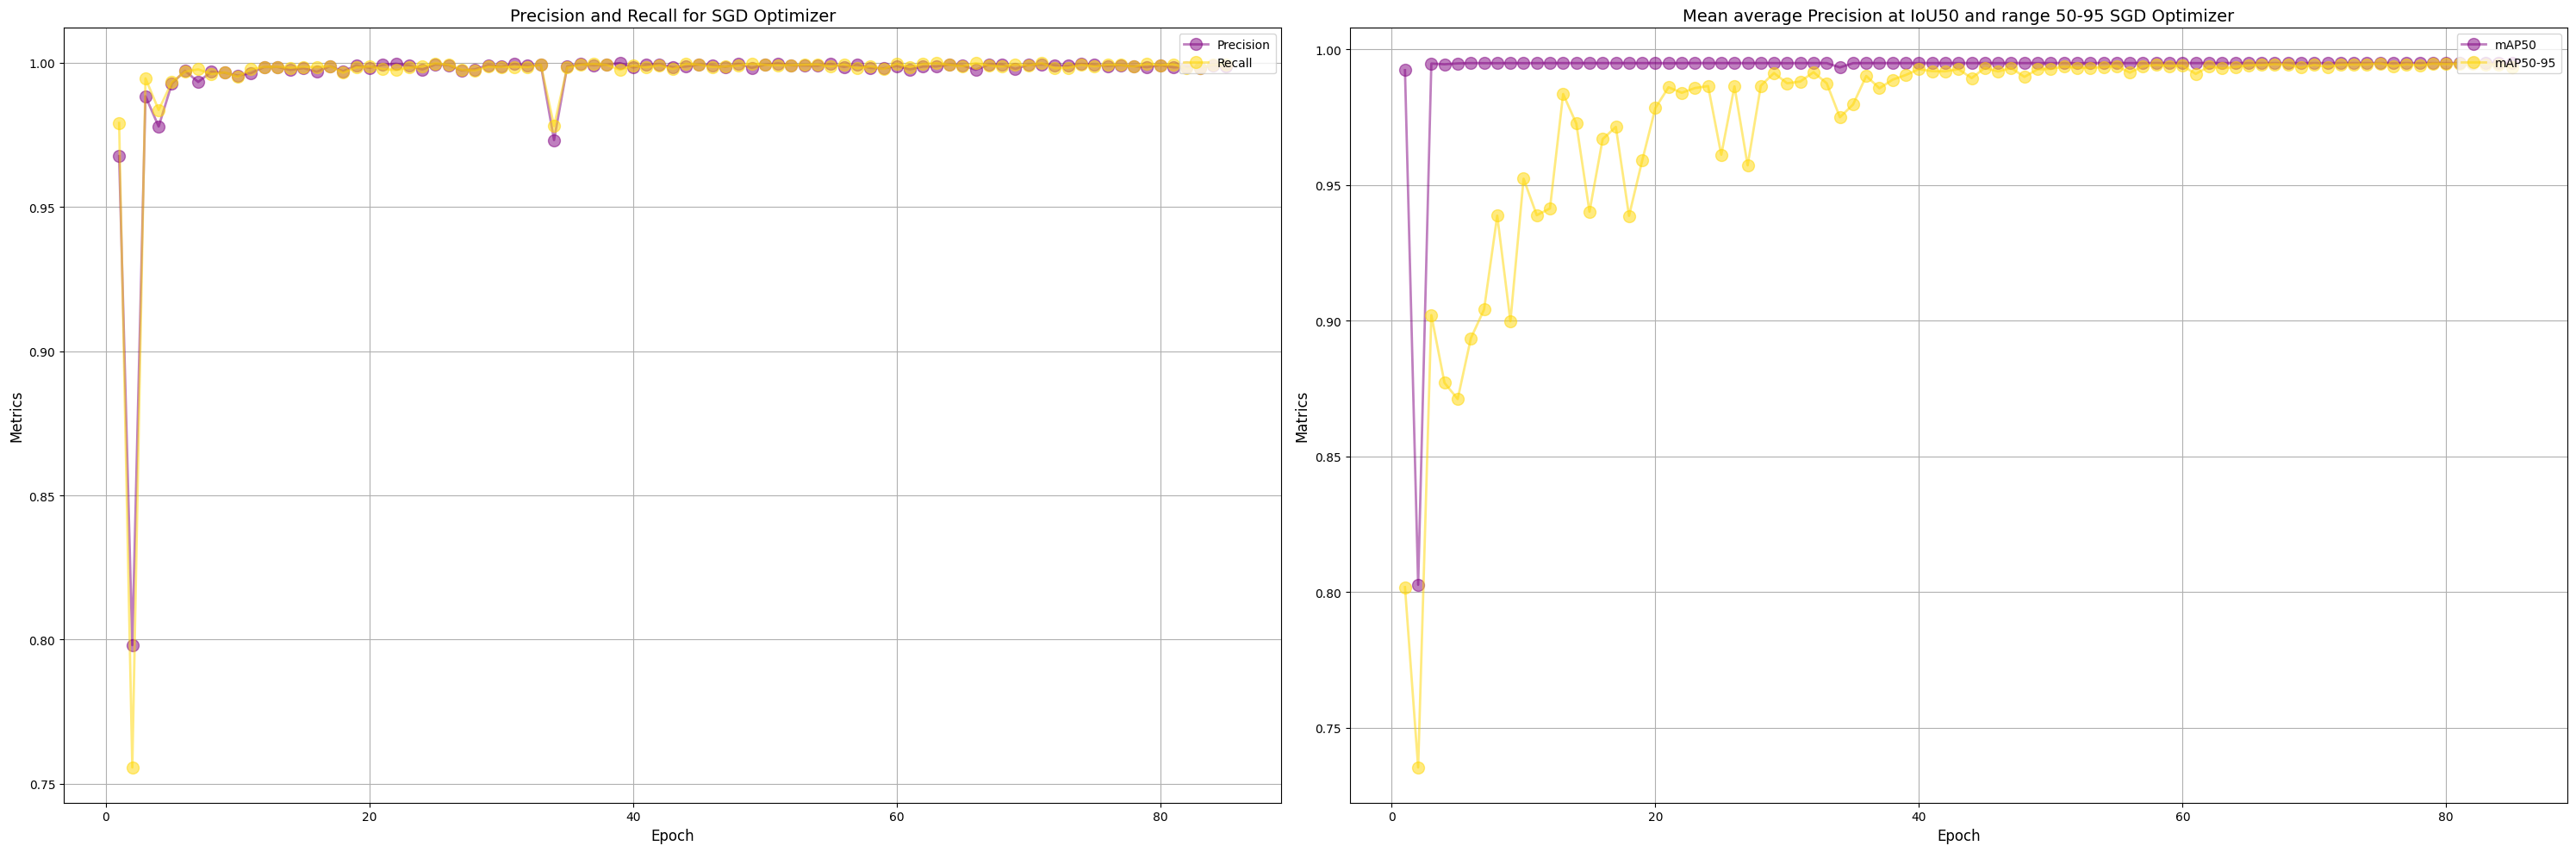

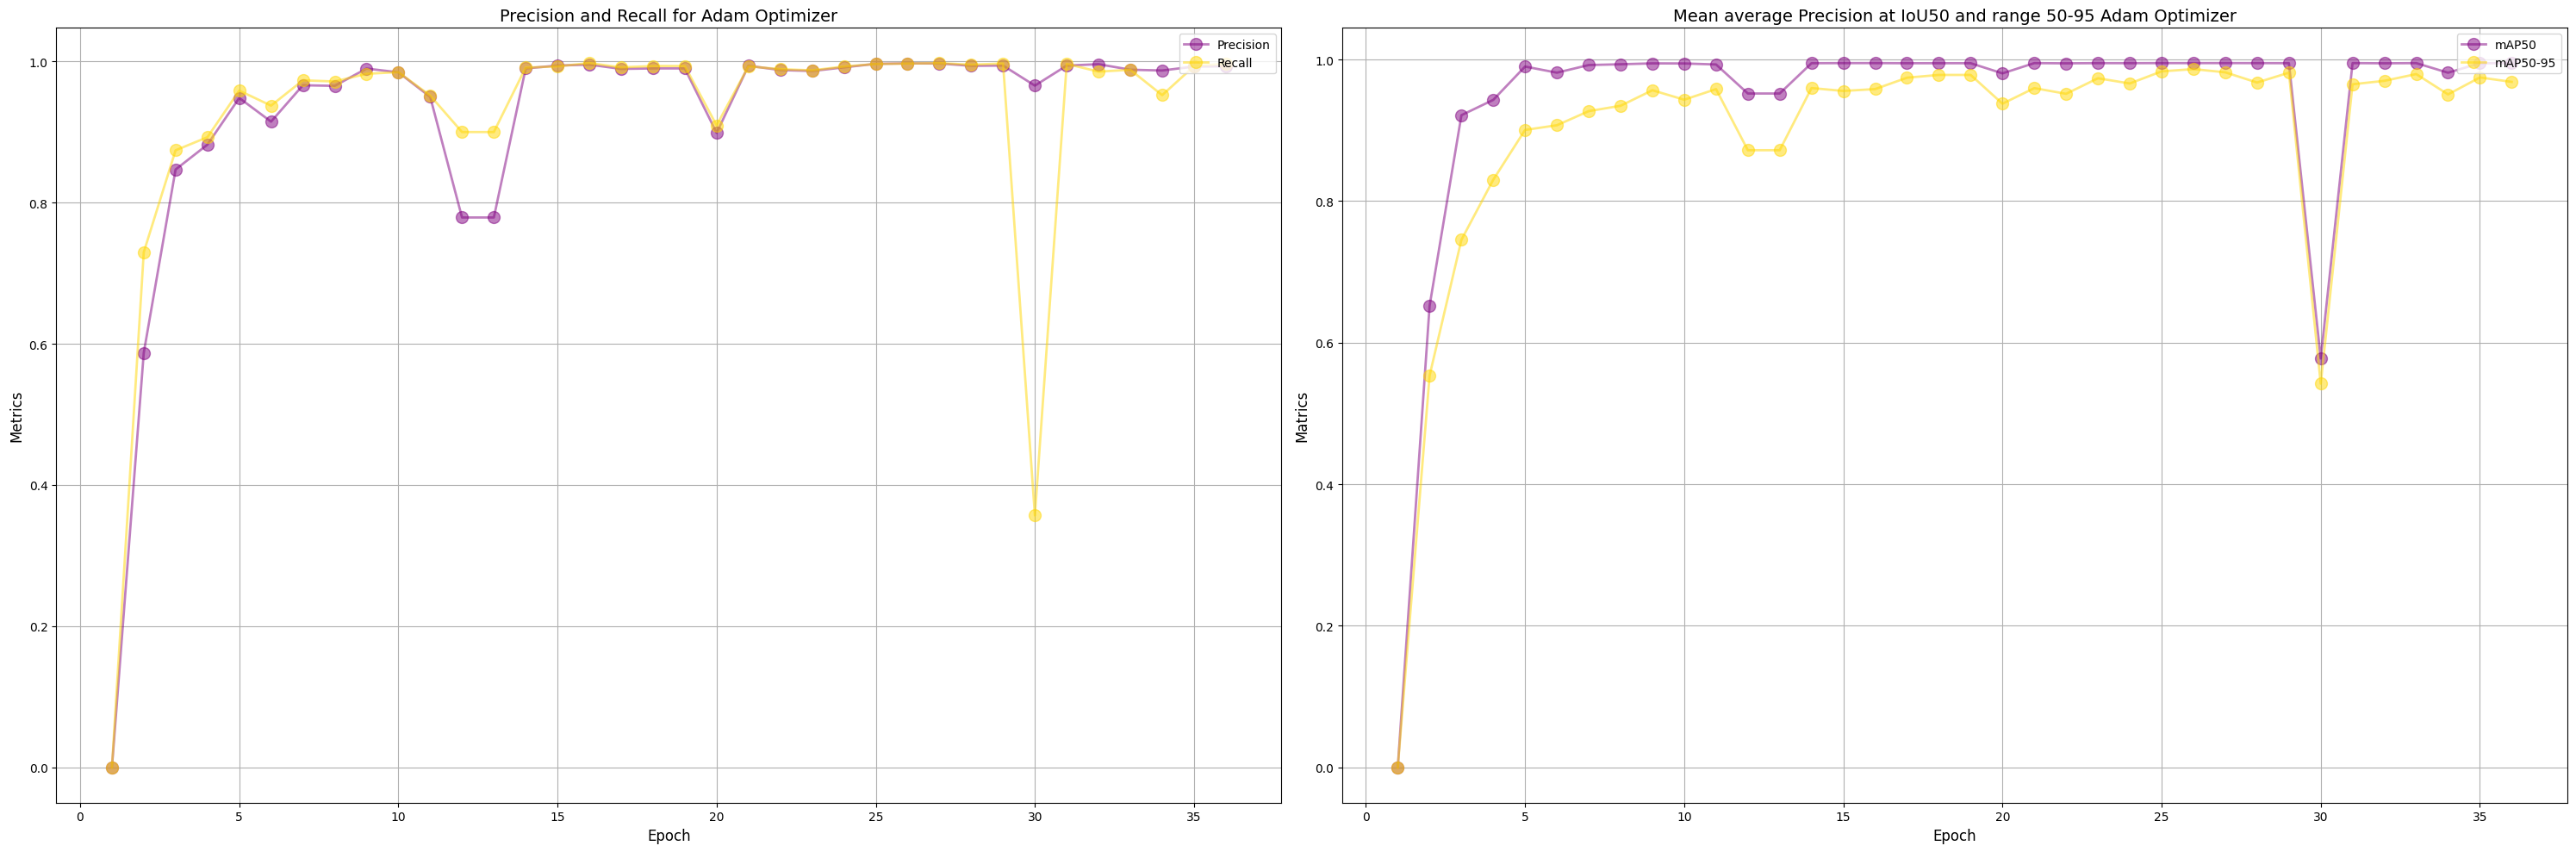

In [25]:
# Optimizer selection and their respective metrices
# 2 plots for recall and precision
for folder in ['AdamW', 'RAdam', 'NAdam', 'SGD', 'Adam']:
    df = pd.read_csv(f"{folder}/results.csv")
    fig, axes = plt.subplots(1,2, figsize=(30, 10))
    axes[0].plot(df.epoch, df['metrics/precision(B)'], 'o-', markersize=10, label='Precision', alpha=0.5, color='purple', linewidth=2)
    axes[0].plot(df.epoch, df['metrics/recall(B)'], 'o-', markersize=10, label='Recall', alpha=0.5, color='gold', linewidth=2)
    axes[0].legend(loc="upper right")
    axes[0].set_title(f'Precision and Recall for {folder} Optimizer', fontsize=14)
    axes[0].set_xlabel("Epoch", fontsize=12)
    axes[0].set_ylabel("Metrics", fontsize=12)
    axes[0].grid(True)

    axes[1].plot(df.epoch, df['metrics/mAP50(B)'], 'o-', markersize=10, label='mAP50', alpha=0.5, color='purple', linewidth=2)
    axes[1].plot(df.epoch, df['metrics/mAP50-95(B)'], 'o-', markersize=10, label='mAP50-95', alpha=0.5, color='gold', linewidth=2)
    axes[1].legend(loc="upper right")
    axes[1].set_title(f'Mean average Precision at IoU50 and range 50-95 {folder} Optimizer', fontsize=14)
    axes[1].set_xlabel("Epoch", fontsize=12)
    axes[1].set_ylabel("Matrics", fontsize=12)
    axes[1].grid(True)


    plt.tight_layout()
    #plt.show()
    plt.savefig(f"{folder}/metrics.png", dpi=300)